# TRABALHO PARTE 1 - EMISSÕES INDUSTRIA 


In [4]:
#https://www.epa.gov/sites/default/files/2020-10/documents/c11s15.pdf minha empresa de produção de vidro - AP42 CAP 11.15

import pandas as pd
import os


In [54]:
# Coletando o caminho da pasta que estou
cwd = os.getcwd()


In [55]:
# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

D:\ENS5173_01\tabelas\FE


In [56]:
# Indicando nome do arquivo
chapterNumer = 11
subChapter = 15
file = 'chp_'+str(11)+'_'+str(15)+'.csv'
print(file)
print(file_path)



chp_11_15.csv
D:\ENS5173_01\tabelas\FE\chp_11_15.csv


In [47]:
import pandas as pd

# Dados dos processos e suas siglas
processos = [
    "Melting furnace",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Flat",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Pressionado e soprado",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Formação e acabamento",
    "Container",
    "Pressionado e soprado",
    "vidro de chumbo"
]

siglas = [
    "MF",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FL",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "PS",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FA",
    "CN",
    "PS",
    "VC"
]

# Criar DataFrame
df = pd.DataFrame({
    'Processo': processos,
    'Sigla': siglas
})

# Exibir o DataFrame
print(df)


                      Processo Sigla
0              Melting furnace    MF
1                 Uncontrolled    UC
2     lavador de baixa energia   LBE
3             scrubber venturi    SV
4             filtro de mangas    FM
5   precipitador eletrostático    PE
6                         Flat    FL
7                 Uncontrolled    UC
8     lavador de baixa energia   LBE
9             scrubber venturi    SV
10            filtro de mangas    FM
11  precipitador eletrostático    PE
12       Pressionado e soprado    PS
13                Uncontrolled    UC
14    lavador de baixa energia   LBE
15            scrubber venturi    SV
16            filtro de mangas    FM
17  precipitador eletrostático    PE
18       Formação e acabamento    FA
19                   Container    CN
20       Pressionado e soprado    PS
21             vidro de chumbo    VC


In [53]:
import pandas as pd
import os

# Definindo o nome do arquivo e os diretórios
file_name = 'chp_11_15.csv'
directories = [
    r'D:\ENS5173_01\tabelas\FE',
    r'D:\ENS5173_01\tabelas',
    r'D:\ENS5173_01'
]

# Tentar abrir o arquivo em cada diretório
file_found = False
for directory in directories:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        try:
            fe = pd.read_csv(file_path)
            print("Arquivo encontrado em:", file_path)
            print(fe)
            file_found = True
            break  # Se encontrar o arquivo, pare o loop
        except Exception as e:
            print(f"Erro ao abrir o arquivo CSV: {e}")

if not file_found:
    print(f"O arquivo '{file_name}' não foi encontrado nos diretórios especificados.")


Arquivo encontrado em: D:\ENS5173_01\tabelas\FE\chp_11_15.csv
    Unnamed: 0                  Unnamed: 1 Unnamed: 2   Unnamed: 3  \
0          NaN                         NaN        NaN          NaN   
1          NaN                    Processo      Sigla  VOC (kg/Mg)   
2          NaN             Melting furnace         MF          NaN   
3          NaN                Uncontrolled         UC          0.1   
4          NaN    Lavador de baixa energia        LBE          0.1   
5          NaN            Scrubber venturi         SV          0.1   
6          NaN            Filtro de mangas         FM          0.1   
7          NaN  Precipitador eletrostático         PE          0.1   
8          NaN                        Flat         FL          NaN   
9          NaN                Uncontrolled         UC         <0.1   
10         NaN    Lavador de baixa energia        LBE         <0.1   
11         NaN            Scrubber venturi         SV         <0.1   
12         NaN            Fi

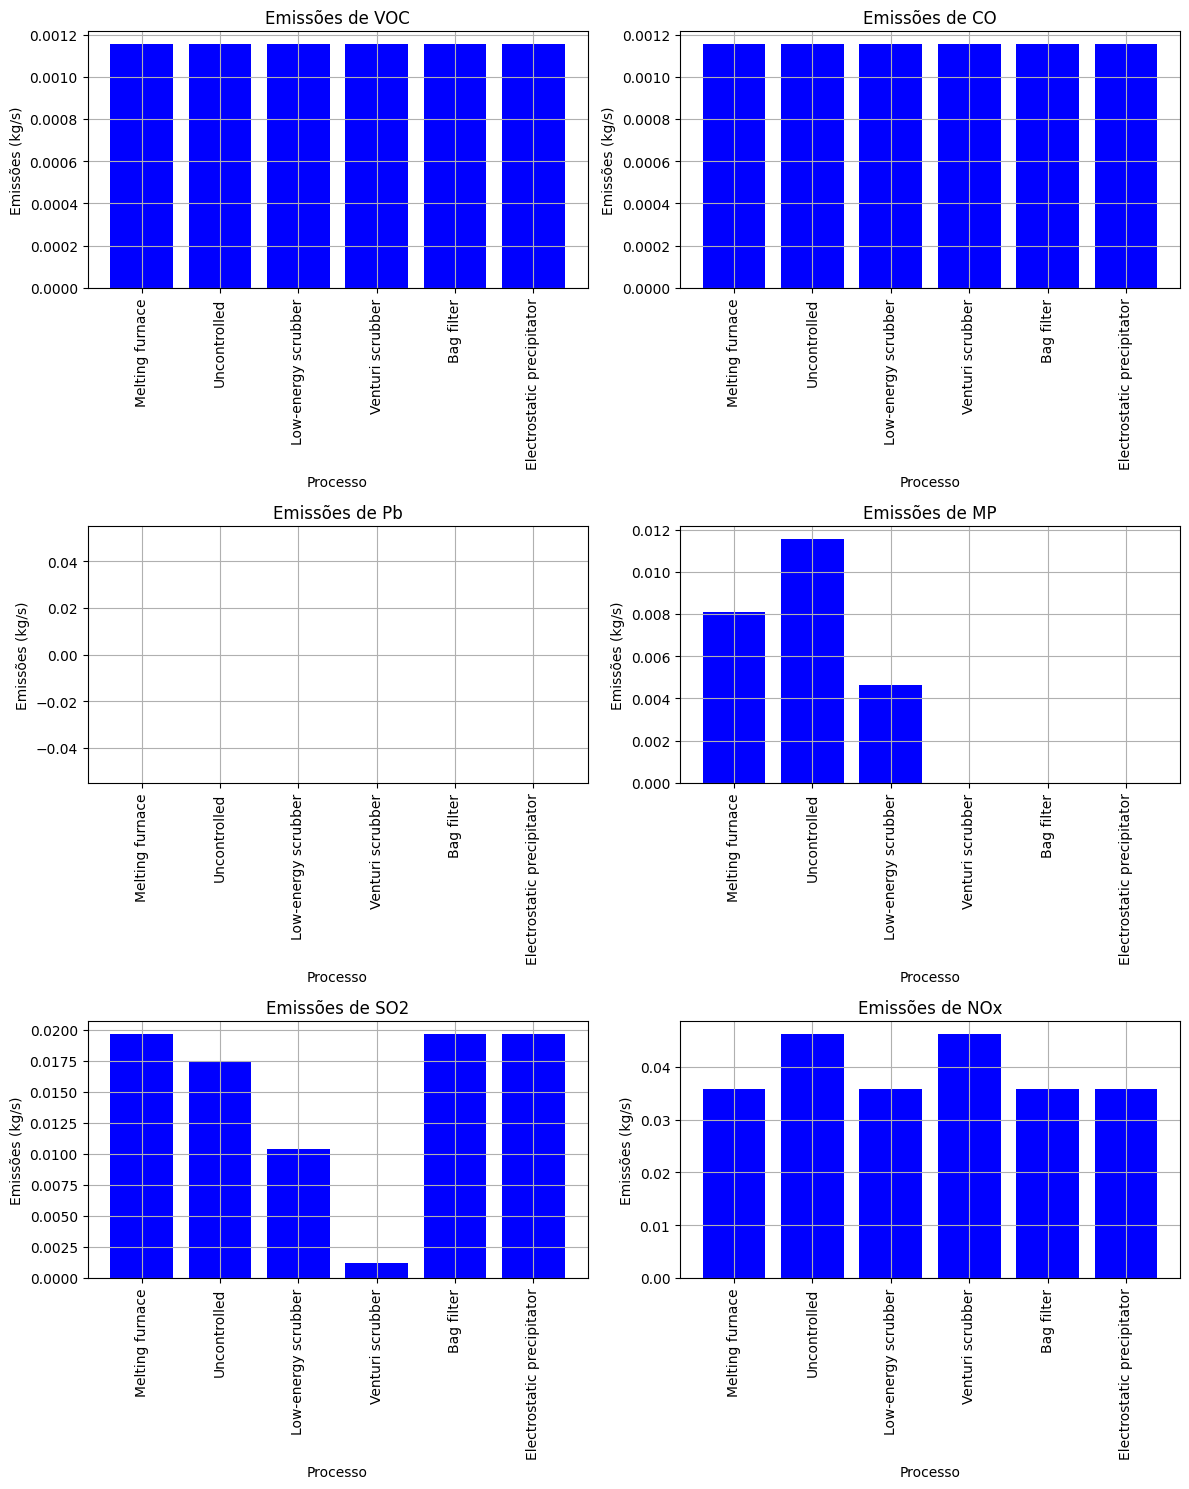

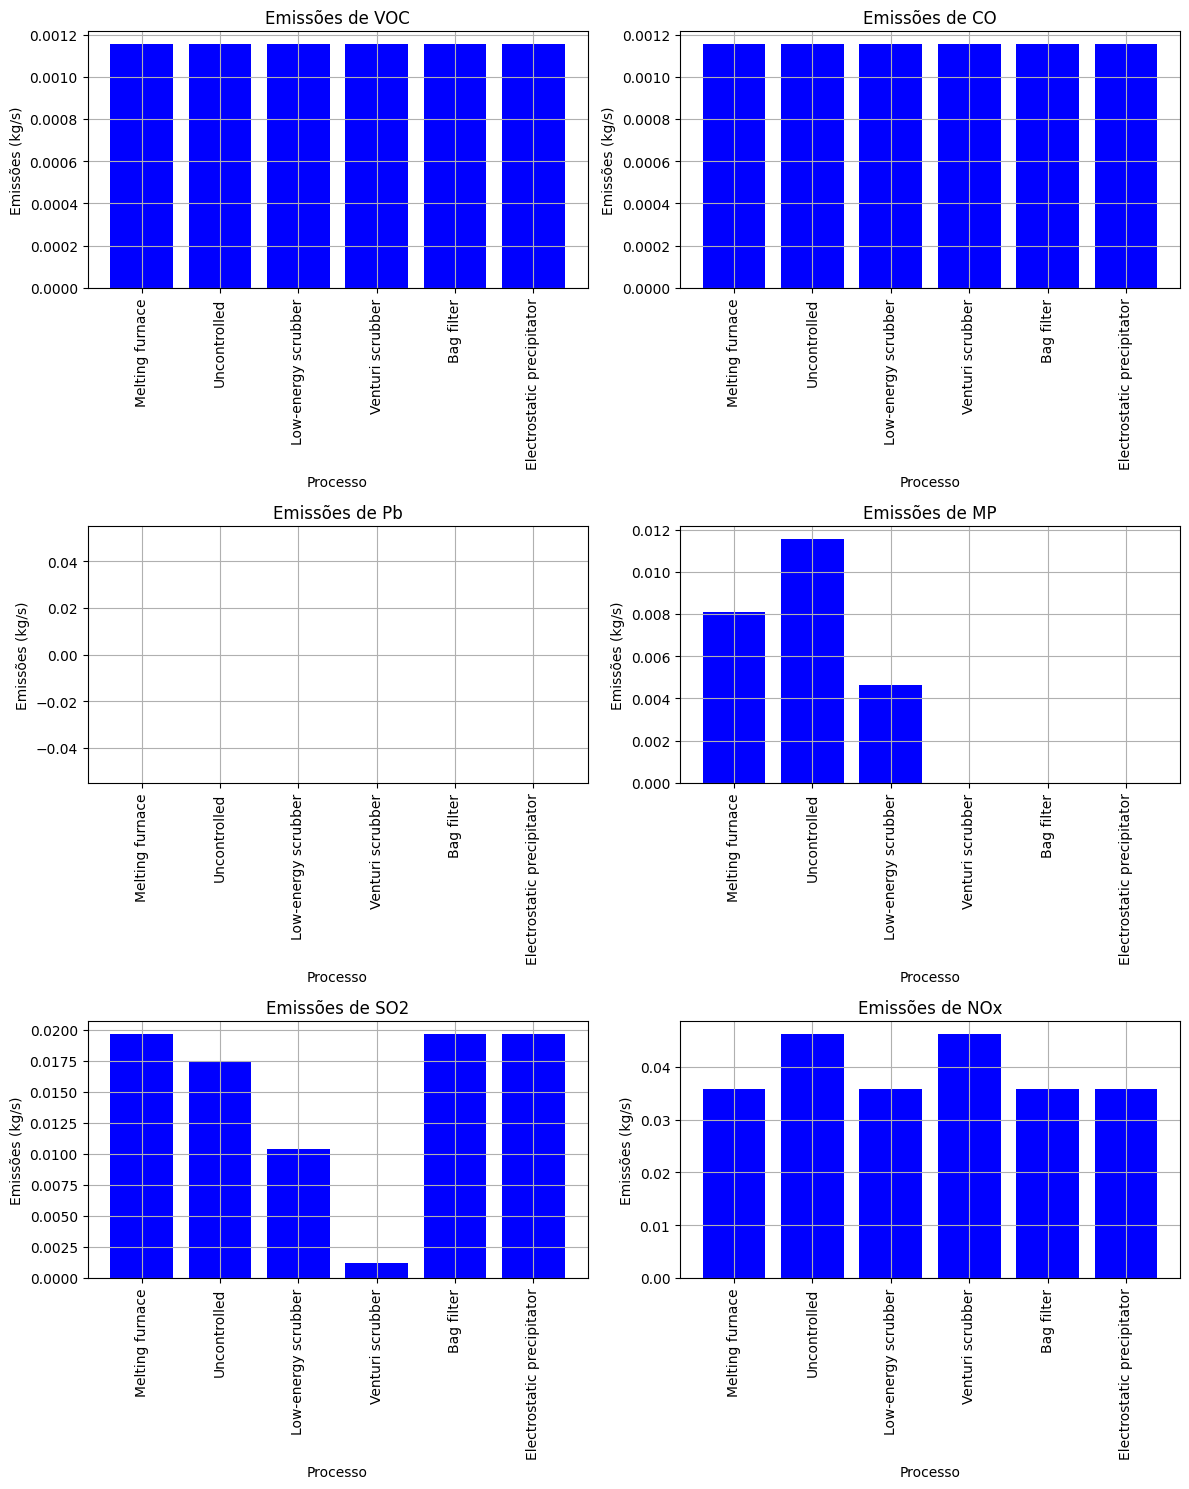

In [4]:
# comparando os processos para  as emissoes


import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Low-energy scrubber', 'Venturi scrubber', 'Bag filter', 'Electrostatic precipitator'],
    'Sigla': ['MF', 'UC', 'LES', 'VS', 'BF', 'EP'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df.iloc[:, 2:] *= (1000) / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Renomeando as colunas para remover "(kg/Mg)" dos rótulos
df.rename(columns=lambda x: x.replace(' (kg/Mg)', ''), inplace=True)

# Definindo os processos
processos = df['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')  # Atualizando o rótulo do eixo Y
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Exportando o gráfico como um arquivo PNG
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')  # Atualizando o rótulo do eixo Y
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/poluentes_e_processos.png')

plt.tight_layout()
plt.show()



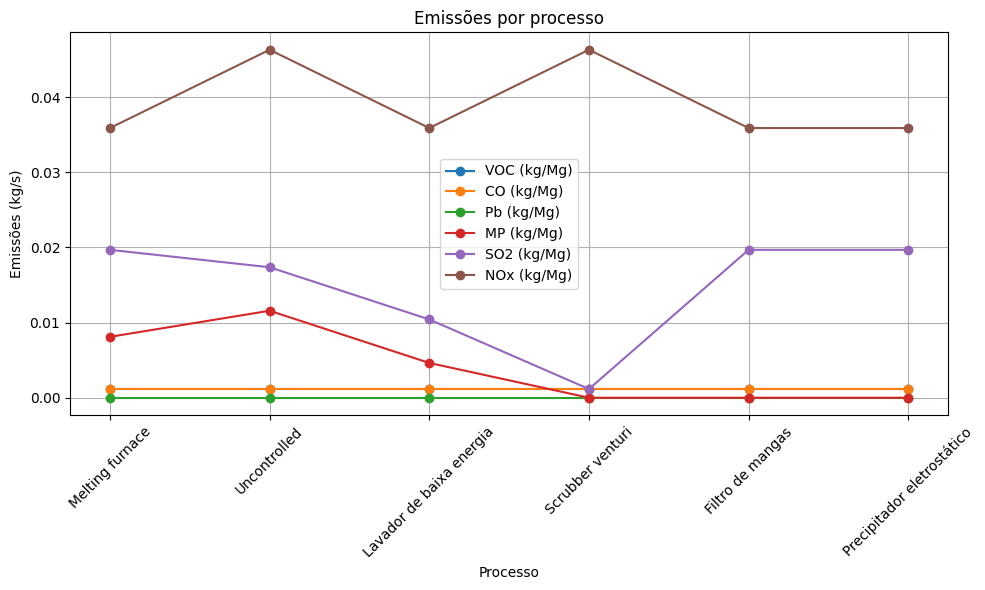

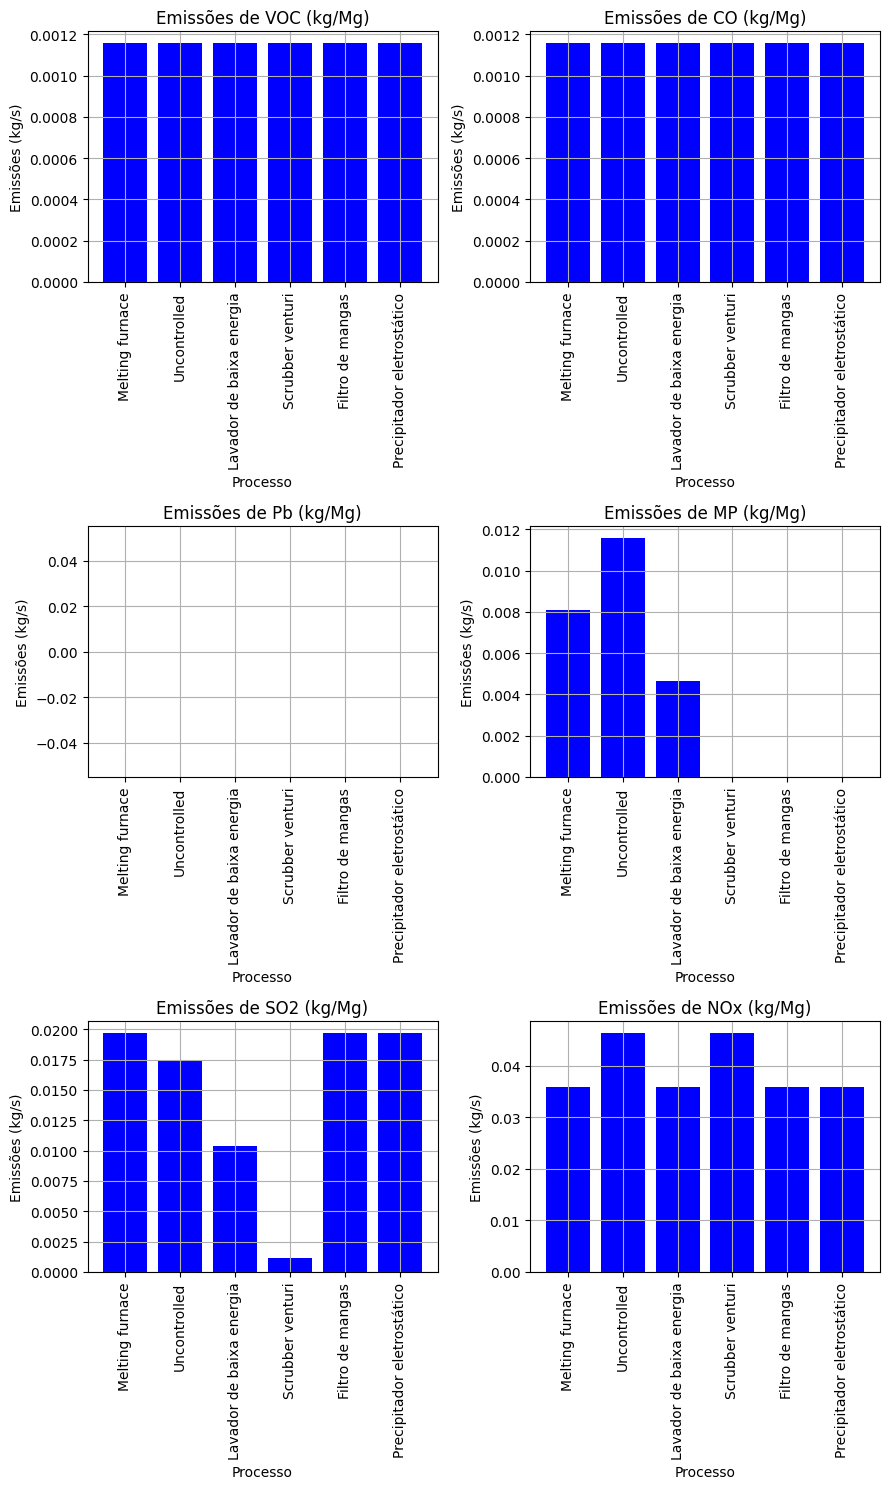

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático'],
    'Sigla': ['MF', 'UC', 'LBE', 'SV', 'FM', 'PE'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df.iloc[:, 2:] *= 1000 / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Definindo os processos
processos = df['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(10, 6))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.plot(processos, emissoes[poluente], marker='o', label=poluente)

plt.title('Emissões por processo')
plt.xlabel('Processo')
plt.ylabel('Emissões (kg/s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(9, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/comparacao_processos.png')

plt.show()




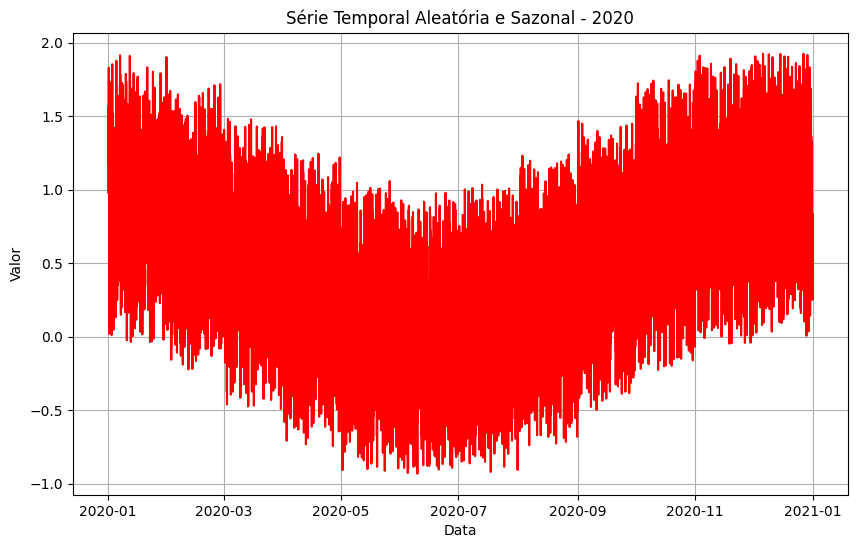

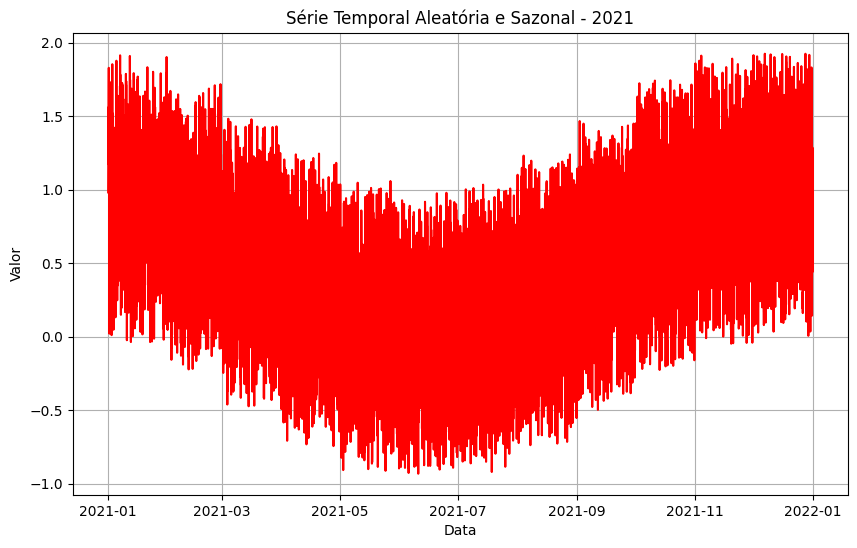

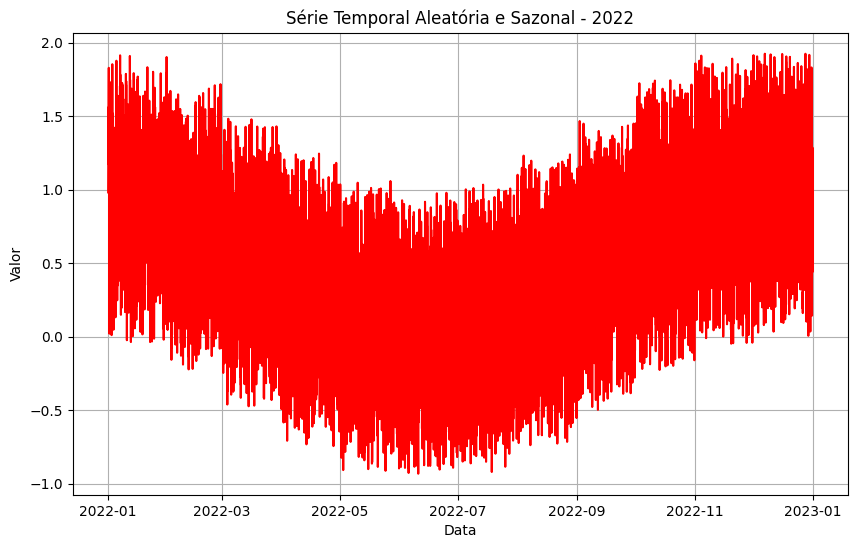

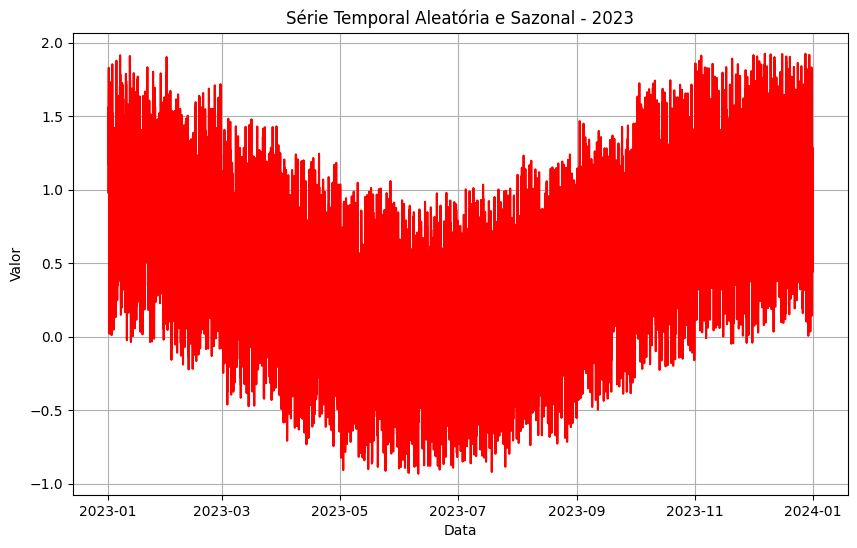

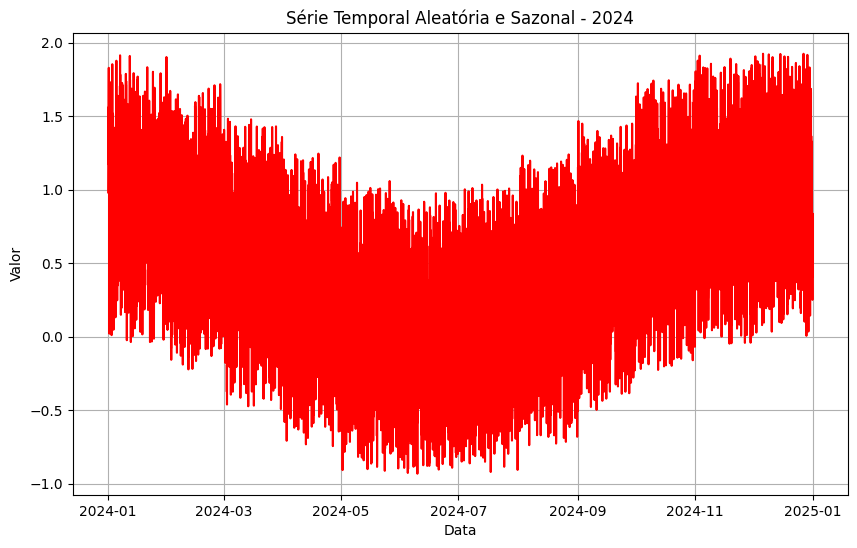

<Figure size 640x480 with 0 Axes>

In [64]:
# FAZENDO SAZONALIDADE E ALEATORIEDADE

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_seasonal_data(path, year):
    # Verificar se o diretório existe, senão, criá-lo
    if not os.path.exists(path):
        os.makedirs(path)
    
    # Criando um intervalo de datas para o ano especificado
    dates = pd.date_range(start=str(year), end=str(year+1), freq='h')
    
    # Criando um DataFrame com as datas
    df = pd.DataFrame({'datetime': dates})
    
    # Adicionando colunas para ano, mês, dia e hora
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    
    # Criando uma coluna de valores aleatórios
    np.random.seed(0)  # Para garantir que os resultados sejam reproduzíveis
    df['random'] = np.random.rand(len(df))
    
    # Adicionando uma componente sazonal
    df['seasonal'] = np.cos(2 * np.pi * df['month'] / 12) + np.sin(2 * np.pi * df['hour'] / 24)
    
    # Criando a série temporal combinando a aleatoriedade e a sazonalidade
    df['timeSeries'] = df['random'] + 0.5 * df['seasonal']
    
    # Salvando os dados em um arquivo CSV
    filename = f"{path}/seasonal_data_{year}.csv"
    df.to_csv(filename, index=False)
    
    # Plotando a série temporal
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['timeSeries'], color='red')
    plt.title(f'Série Temporal Aleatória e Sazonal - {year}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.savefig(f"{path}/seasonal_plot_{year}.png")
    plt.show()

# Exemplo de uso
path = "D:/ENS5173_01/seasonal_data"
for year in range(2020, 2025):
    generate_seasonal_data(path, year)


# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/SERIE_ALEATORIA_SAZONAL.png')


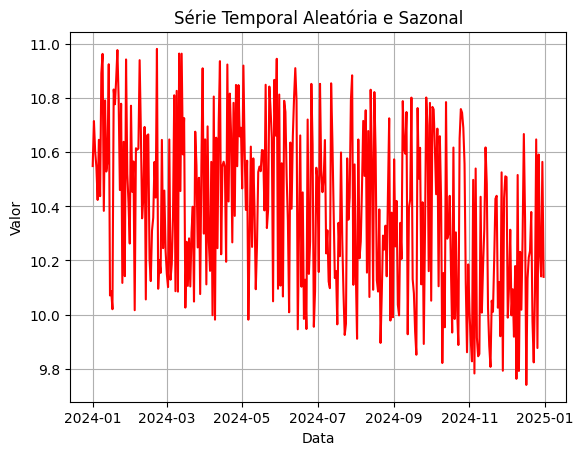

<Figure size 640x480 with 0 Axes>

In [67]:
#CRIANDO DATAS PARA SERIE TEMPORAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criando um DataFrame de exemplo com datas
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
df = pd.DataFrame({'datetime': dates})

# Adicionando colunas de ano, mês e dia
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

# Criando uma componente sazonal
tt = np.arange(0, df.shape[0], 1)
df['sazonal'] = np.cos(tt / (360 * 4))

# Gerando uma série temporal aleatória
np.random.seed(0)
df['random'] = np.random.rand(len(df))
df['timeSeries'] = 10 * df['sazonal'] + df['random']

# Plotando a série temporal
plt.plot(df['datetime'], df['timeSeries'], color='red')
plt.title('Série Temporal Aleatória e Sazonal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/SERIE_TEMPORAL_E_SAZONAL_01.png')

In [68]:
# CRIANDO DATA FRAME COM DATAS 
import pandas as pd
import numpy as np

# Criando um intervalo de datas
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criando um DataFrame com as datas
df = pd.DataFrame({'datetime': dates})

# Adicionando colunas de valores aleatórios, ano, mês e dia
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
df['random'] = np.random.rand(len(df))
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

# Criando uma componente sazonal
tt = np.arange(0, df.shape[0], 1)
df['sazonal'] = np.cos(tt / (360 * 4))

# Criando a série temporal combinando a aleatoriedade e a sazonalidade
df['timeSeries'] = 10 * df['sazonal'] + df['random']

# Exibindo o DataFrame
print(df)


      datetime    random  year  month  day   sazonal  timeSeries
0   2024-01-01  0.548814  2024      1    1  1.000000   10.548814
1   2024-01-02  0.715189  2024      1    2  1.000000   10.715187
2   2024-01-03  0.602763  2024      1    3  0.999999   10.602754
3   2024-01-04  0.544883  2024      1    4  0.999998   10.544861
4   2024-01-05  0.423655  2024      1    5  0.999996   10.423616
..         ...       ...   ...    ...  ...       ...         ...
361 2024-12-27  0.903984  2024     12   27  0.968740   10.591388
362 2024-12-28  0.543806  2024     12   28  0.968568   10.229485
363 2024-12-29  0.456911  2024     12   29  0.968395   10.140860
364 2024-12-30  0.882041  2024     12   30  0.968221   10.564256
365 2024-12-31  0.458604  2024     12   31  0.968048   10.139079

[366 rows x 7 columns]


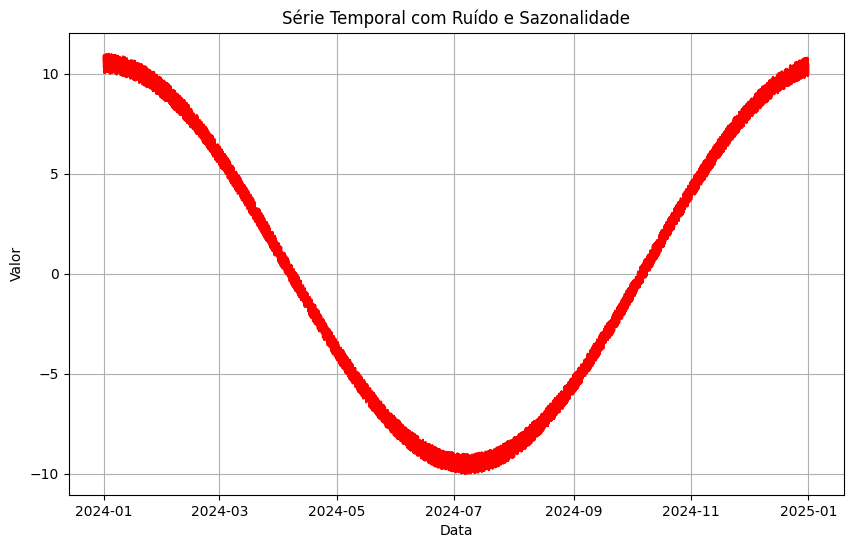

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2024-01-01 00:00:00,2024-01-01 00:00:00,2024,1,1,0.341576,1.000000,10.341576
2024-01-01 01:00:00,2024-01-01 01:00:00,2024,1,1,0.901145,1.000000,10.901143
2024-01-01 02:00:00,2024-01-01 02:00:00,2024,1,1,0.582217,0.999999,10.582208
2024-01-01 03:00:00,2024-01-01 03:00:00,2024,1,1,0.843352,0.999998,10.843330
2024-01-01 04:00:00,2024-01-01 04:00:00,2024,1,1,0.244359,0.999996,10.244321
...,...,...,...,...,...,...,...
2024-12-31 19:00:00,2024-12-31 19:00:00,2024,12,31,0.556256,0.982630,10.382556
2024-12-31 20:00:00,2024-12-31 20:00:00,2024,12,31,0.552160,0.982759,10.379746
2024-12-31 21:00:00,2024-12-31 21:00:00,2024,12,31,0.142539,0.982887,9.971407


In [75]:
#criando função

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def noiseCreation(path, year):
    """
    Esta função cria um ruído com sazonalidade.
    
    Inputs:
        path: Caminho para salvar o arquivo CSV.
        year: Ano para o qual os dados serão gerados.
    
    Criado por Muriell
    """
    
    # Criando um DataFrame
    df = pd.DataFrame()
    
    # Criando vetor temporal
    dtime = np.arange(np.datetime64(str(year) + "-01-01"), np.datetime64(str(year + 1) + "-01-01"), np.timedelta64(1, "h"))
    
    # Adicionando as datas ao DataFrame
    df["datetime"] = dtime
    
    # Definindo o índice como a coluna de datetime
    df = df.set_index(df["datetime"])
    
    # Criando colunas com ano, mês e dia
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["day"] = df.index.day
    
    # Criando uma coluna com valores aleatórios
    df["random"] = np.random.rand(df.shape[0])
    
    # Adicionando sazonalidade
    tt = np.arange(0, df.shape[0], 1)
    df["sazonal"] = np.cos(tt / (360 * 4))
    
    # Criando a série temporal combinando aleatoriedade e sazonalidade
    df["timeSeries"] = 10 * df["sazonal"] + df["random"]
    
    # Plotando a série temporal
    plt.figure(figsize=(10, 6))
    plt.plot(df["datetime"], df["timeSeries"], color="red")
    plt.title("Série Temporal com Ruído e Sazonalidade")
    plt.xlabel("Data")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.savefig(f"{path}/noise_{year}.png")
    plt.show()
    
    # Salvando os dados em um arquivo CSV
    df.to_csv(f"{path}/noise_{year}.csv", index=False)
    
    return df

# Exemplo de uso
path = "D:/ENS5173_01/seasonal_data"

year = 2024
noiseCreation(path, year)


2002


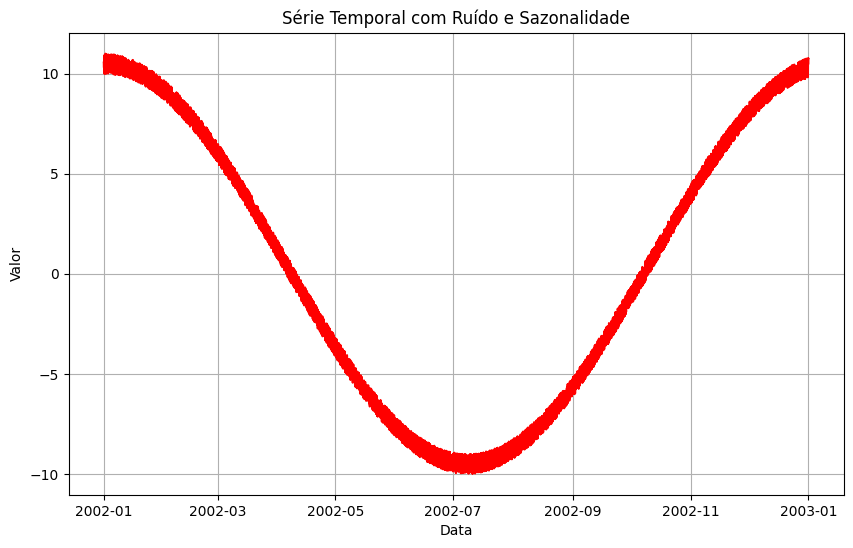

2003


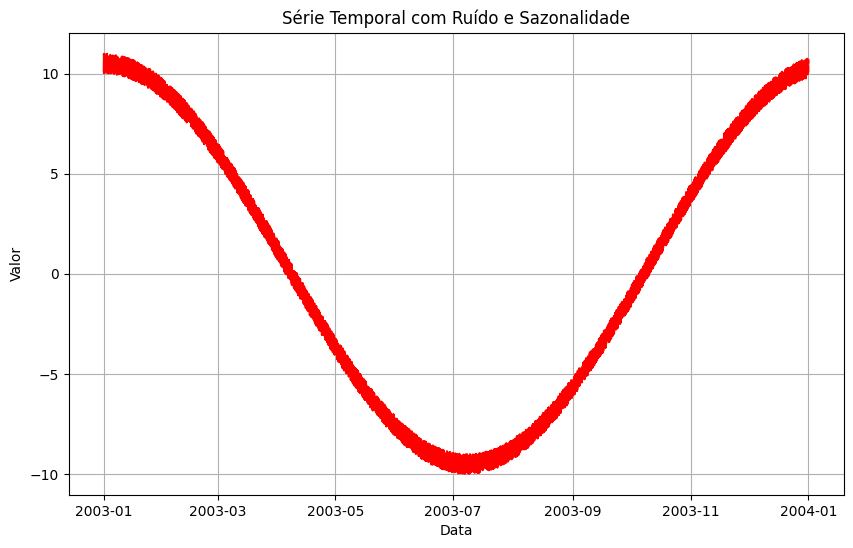

2004


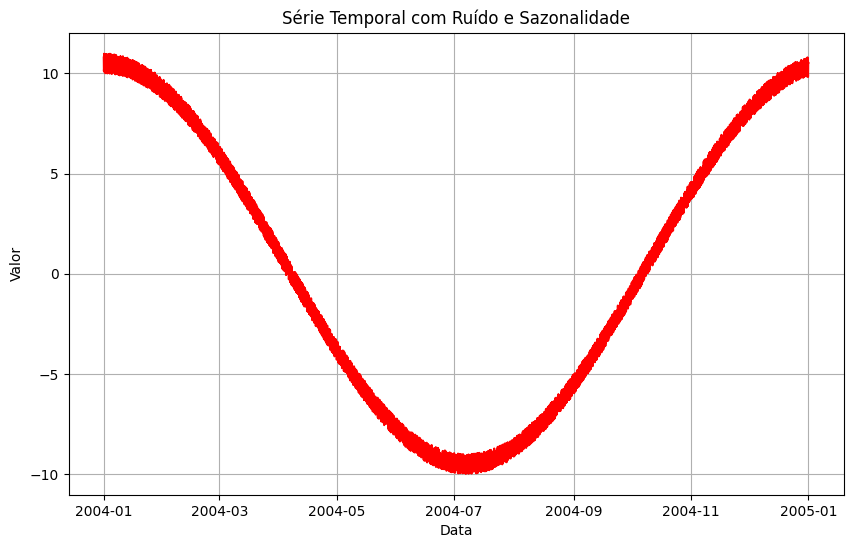

2005


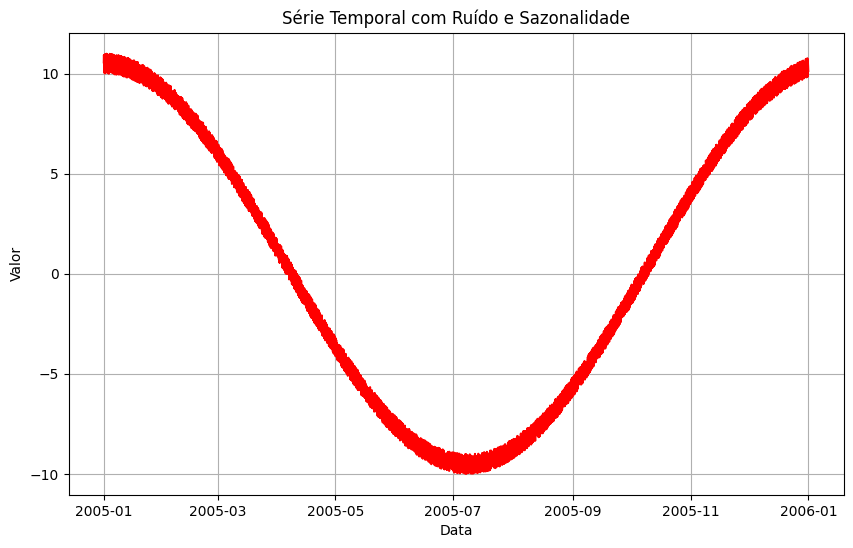

2006


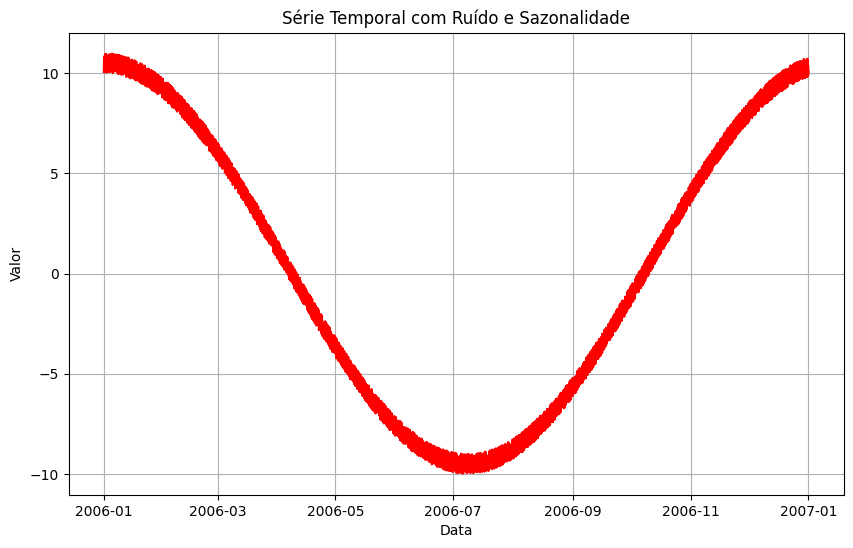

2007


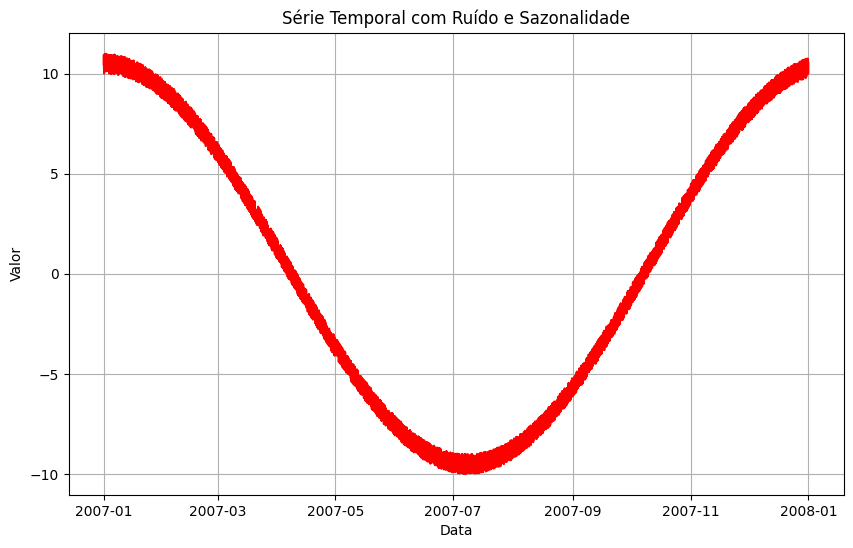

2008


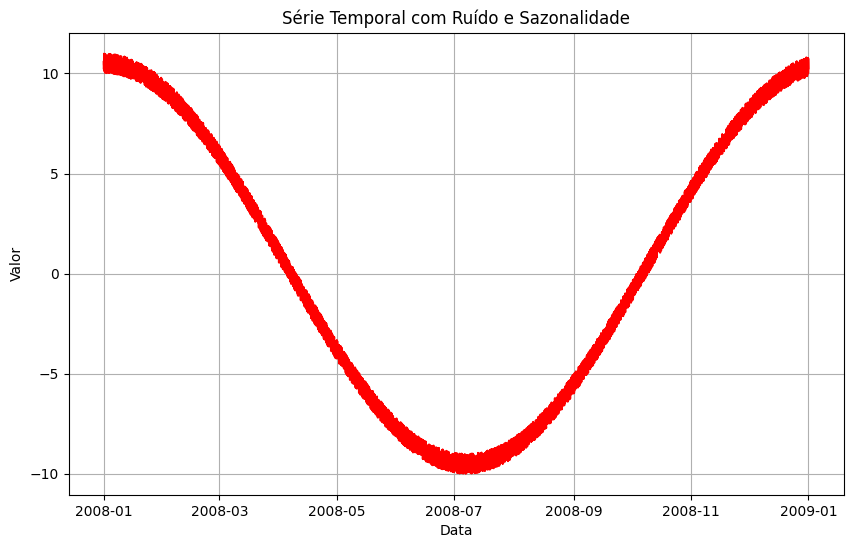

2009


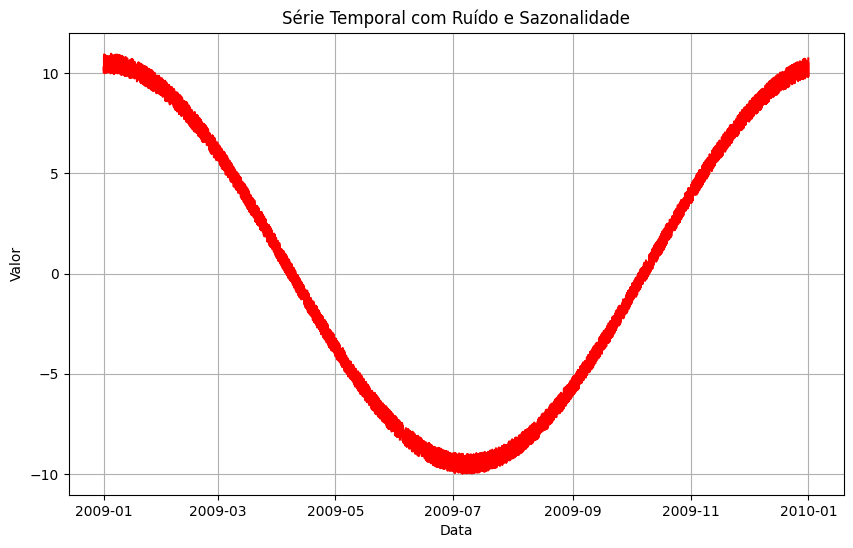

In [72]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

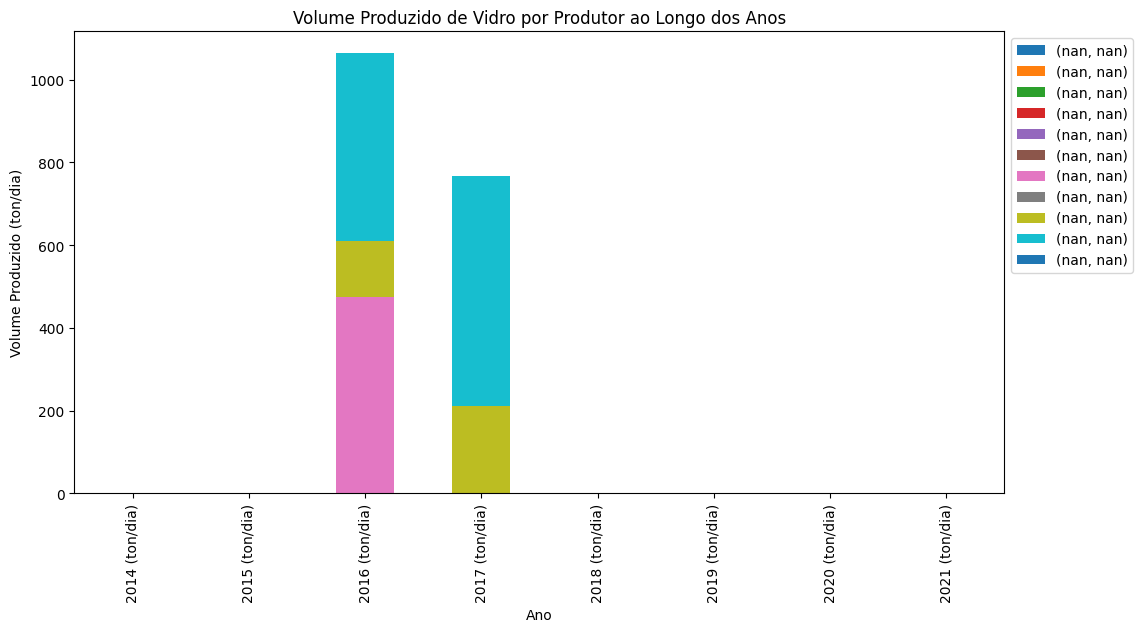

In [73]:
#fazendo o panorama Capacidade nominal de produção de vidros planos (t/dia) da industria de vidro no brasil 


import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV
caminho_arquivo = r'D:\ENS5173_01\tabelas\PROD_BR\PROD_IND_VIDRO.csv'

# Definindo nomes para as colunas
nomes_colunas = ['produtor', 'Planta', '2014 (ton/dia)', '2015 (ton/dia)', '2016 (ton/dia)', '2017 (ton/dia)', '2018 (ton/dia)', '2019 (ton/dia)', '2020 (ton/dia)', '2021 (ton/dia)']

# Leia o arquivo CSV e armazene-o em um DataFrame
df = pd.read_csv(caminho_arquivo, encoding='utf-8', names=nomes_colunas, skiprows=1)

# Convertendo as colunas numéricas para o tipo correto
colunas_numericas = ['2014 (ton/dia)', '2015 (ton/dia)', '2016 (ton/dia)', '2017 (ton/dia)', '2018 (ton/dia)', '2019 (ton/dia)', '2020 (ton/dia)', '2021 (ton/dia)']
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# Transpondo o DataFrame para que os anos se tornem linhas e os produtores se tornem colunas
df = df.set_index(['produtor', 'Planta']).T

# Plotando o gráfico de barras empilhadas
ax = df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionando título e rótulos dos eixos
plt.title('Volume Produzido de Vidro por Produtor ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Volume Produzido (ton/dia)')

# Exibindo a legenda fora do gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mostrando o gráfico
plt.show()


In [41]:
# COMPARANDO EMISSÕES DA INDUSTRIA BRASILEIRA - DE ACORDO COM O INVENTÁRIO A PARTIR DOS DADOS DE CADA EMPRESA, DE PROCESSOS COM CONTROLE E SEM CONTROLE 


# Valores das emissões sem controle (kg/d)
emissoes_sem_controle = {
    'Embalagem': {'MP': 5452.32, 'SOx': 18420.00, 'NOx': 26158.80},
    'Plano': {'MP': 2724.00, 'SOx': 22700.00, 'NOx': 29845.00},
    'Doméstico': {'MP': 6463.80, 'SOx': 2565.00, 'NOx': 3770.00},
    'Especiais': {'MP': 617.7, 'SOx': 3697.30, 'NOx': 83718.02},
    'Total': {'MP': 15257.82, 'SOx': 47382.30, 'NOx': 143491.82}
}

# Valores das emissões com controle (kg/d)
emissoes_com_controle = {
    'Embalagem': {'MP': 474.24, 'SOx': 4373.03, 'NOx': 4469.48},
    'Plano': {'MP': 1071.50, 'SOx': 6048.90, 'NOx': 17940.30},
    'Doméstico': {'MP': 135.28, 'SOx': 210.31, 'NOx': 1554.72},
    'Especiais': {'MP': 453.86, 'SOx': 557.89, 'NOx': 3222.27},
    'Total': {'MP': 2134.88, 'SOx': 11190.13, 'NOx': 27186.77}
}

# Função para converter os valores de kg/d para kg/s
def kg_d_to_kg_s(valor_kg_d):
    return valor_kg_d / 86400

# Dicionário para armazenar as diferenças de emissões (kg/s)
diferencas_emissoes = {}

# Calcular as diferenças para cada tipo de vidro e para o total
for tipo_vidro in emissoes_sem_controle.keys():
    diferencas_emissoes[tipo_vidro] = {}
    for poluente in emissoes_sem_controle[tipo_vidro].keys():
        valor_sem_controle = emissoes_sem_controle[tipo_vidro][poluente]
        valor_com_controle = emissoes_com_controle[tipo_vidro][poluente]
        diferenca = kg_d_to_kg_s(valor_sem_controle) - kg_d_to_kg_s(valor_com_controle)
        diferencas_emissoes[tipo_vidro][poluente] = diferenca

# Exibir as diferenças de emissões
print("Diferenças de emissões (kg/s):")
for tipo_vidro, valores in diferencas_emissoes.items():
    print(f"{tipo_vidro}:")
    for poluente, diferenca in valores.items():
        print(f"  {poluente}: {diferenca:.2f} kg/s")


Diferenças de emissões (kg/s):
Embalagem:
  MP: 0.06 kg/s
  SOx: 0.16 kg/s
  NOx: 0.25 kg/s
Plano:
  MP: 0.02 kg/s
  SOx: 0.19 kg/s
  NOx: 0.14 kg/s
Doméstico:
  MP: 0.07 kg/s
  SOx: 0.03 kg/s
  NOx: 0.03 kg/s
Especiais:
  MP: 0.00 kg/s
  SOx: 0.04 kg/s
  NOx: 0.93 kg/s
Total:
  MP: 0.15 kg/s
  SOx: 0.42 kg/s
  NOx: 1.35 kg/s


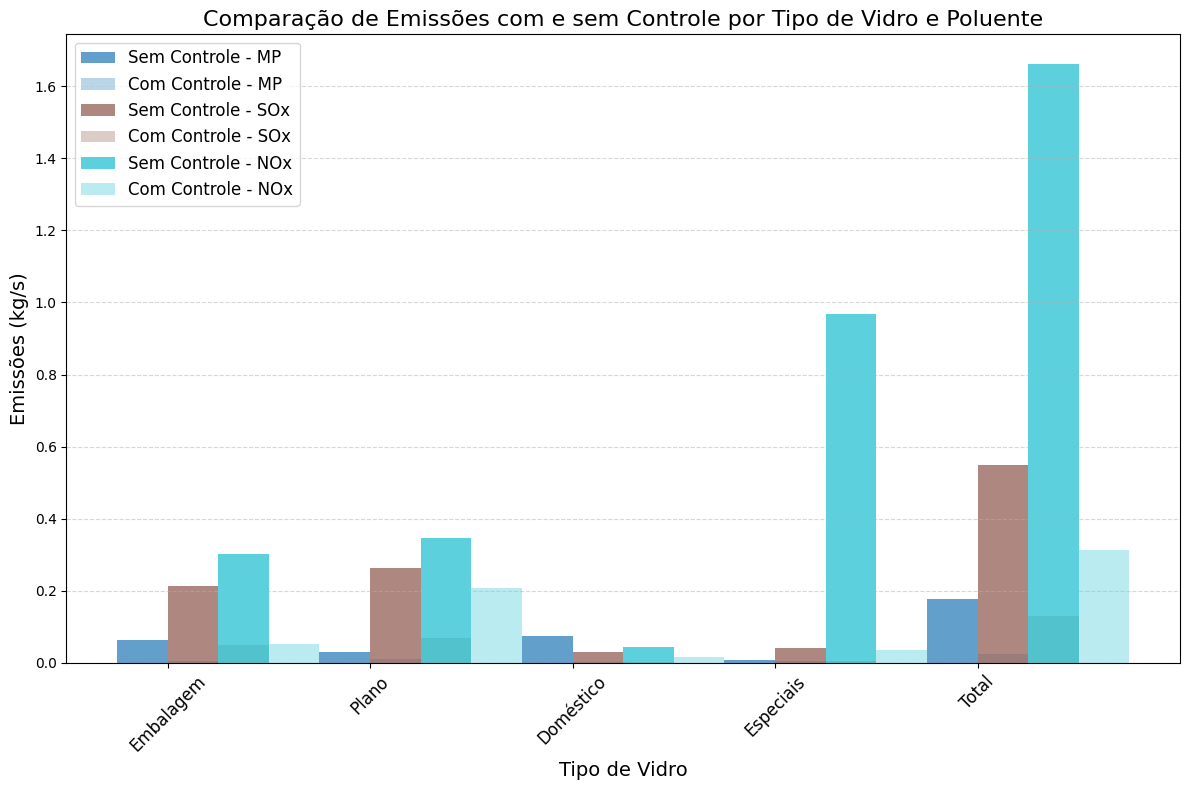

Figura salva em: D:\ENS5173_01\figures\EMISSOES_COM_E_SEM_CONTROLE_IND_BR.png


In [74]:
#FAZENDO GRAFICO DE COMPARAÇÃO DAS EMISSOES PARA CADA TIPO DE VIDRO, DADOS DA INDUSTRI BRASILEIRA ( PROCESSOS COM CONTROLE X SEM CONTROLE)
import matplotlib.pyplot as plt
import numpy as np
import os

# Função para converter kg/d para kg/s
def kg_por_segundo(valor_kg_d):
    return valor_kg_d / (24 * 3600)  # Convertendo de kg/d para kg/s

# Dados das emissões sem controle (kg/d)
emissoes_sem_controle = {
    'Embalagem': {'MP': 5452.32, 'SOx': 18420.00, 'NOx': 26158.80},
    'Plano': {'MP': 2724.00, 'SOx': 22700.00, 'NOx': 29845.00},
    'Doméstico': {'MP': 6463.80, 'SOx': 2565.00, 'NOx': 3770.00},
    'Especiais': {'MP': 617.7, 'SOx': 3697.30, 'NOx': 83718.02},
    'Total': {'MP': 15257.82, 'SOx': 47382.30, 'NOx': 143491.82}
}

# Dados das emissões com controle (kg/d)
emissoes_com_controle = {
    'Embalagem': {'MP': 474.24, 'SOx': 4373.03, 'NOx': 4469.48},
    'Plano': {'MP': 1071.50, 'SOx': 6048.90, 'NOx': 17940.30},
    'Doméstico': {'MP': 135.28, 'SOx': 210.31, 'NOx': 1554.72},
    'Especiais': {'MP': 453.86, 'SOx': 557.89, 'NOx': 3222.27},
    'Total': {'MP': 2134.88, 'SOx': 11190.13, 'NOx': 27186.77}
}

# Converter para kg/s
for tipo, dados in emissoes_sem_controle.items():
    for poluente, valor in dados.items():
        emissoes_sem_controle[tipo][poluente] = kg_por_segundo(valor)

for tipo, dados in emissoes_com_controle.items():
    for poluente, valor in dados.items():
        emissoes_com_controle[tipo][poluente] = kg_por_segundo(valor)

# Lista de tipos de vidro
tipos_vidro = list(emissoes_sem_controle.keys())

# Lista de poluentes
poluentes = ['MP', 'SOx', 'NOx']

# Cores para os poluentes
cores = plt.cm.tab10(np.linspace(0, 1, len(poluentes)))

# Configurações do gráfico
largura_barra = 0.25
indice = np.arange(len(tipos_vidro))

# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(12, 8))

for i, poluente in enumerate(poluentes):
    valores_sem_controle = [emissoes_sem_controle[tipo][poluente] for tipo in tipos_vidro]
    valores_com_controle = [emissoes_com_controle[tipo][poluente] for tipo in tipos_vidro]

    # Barra para os valores sem controle
    ax.bar(indice - largura_barra/2 + i * largura_barra, valores_sem_controle,
           largura_barra, label=f'Sem Controle - {poluente}', color=cores[i], alpha=0.7)
    
    # Barra para os valores com controle
    ax.bar(indice + largura_barra/2 + i * largura_barra, valores_com_controle,
           largura_barra, label=f'Com Controle - {poluente}', color=cores[i], alpha=0.3)

# Configurações adicionais do gráfico
ax.set_xlabel('Tipo de Vidro', fontsize=14)
ax.set_ylabel('Emissões (kg/s)', fontsize=14)
ax.set_title('Comparação de Emissões com e sem Controle por Tipo de Vidro e Poluente', fontsize=16)
ax.set_xticks(indice)
ax.set_xticklabels(tipos_vidro, fontsize=12)
ax.legend(fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Definindo o diretório de salvamento
diretorio_salvamento = r'D:\ENS5173_01\figures'
if not os.path.exists(diretorio_salvamento):
    os.makedirs(diretorio_salvamento)

# Salvar a figura
caminho_figura = os.path.join(diretorio_salvamento, 'EMISSOES_COM_E_SEM_CONTROLE_IND_BR.png')
fig.savefig(caminho_figura)

plt.show()

print(f"Figura salva em: {caminho_figura}")


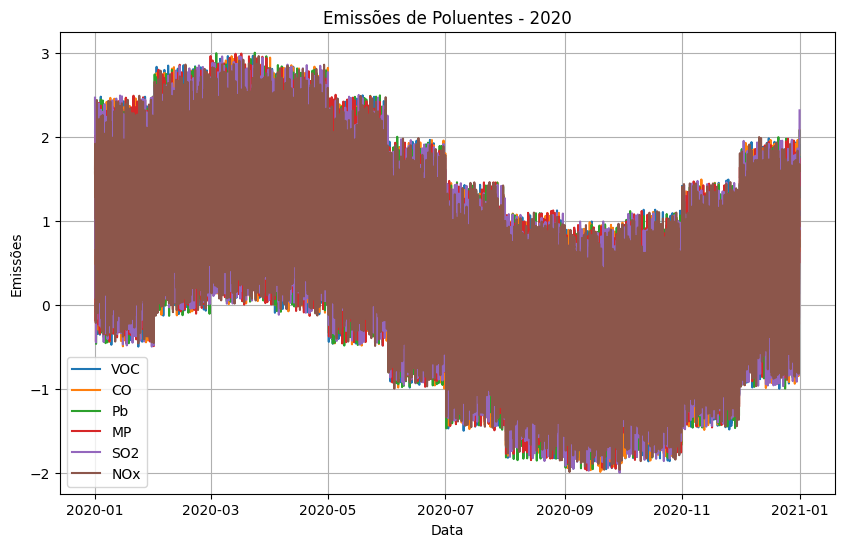

<Figure size 640x480 with 0 Axes>

Figura salva em: D:/ENS5173_01/seasonal_data\Distribuicao_anual_emissoes.png


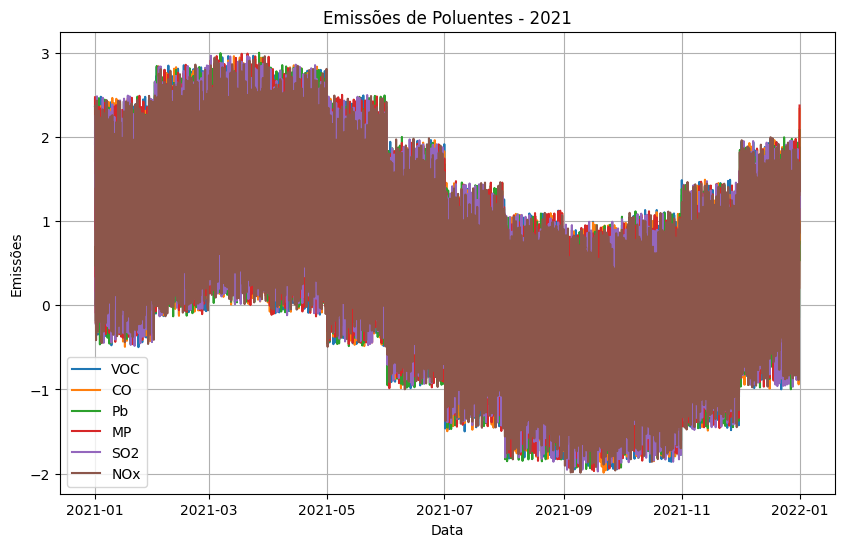

<Figure size 640x480 with 0 Axes>

Figura salva em: D:/ENS5173_01/seasonal_data\Distribuicao_anual_emissoes.png


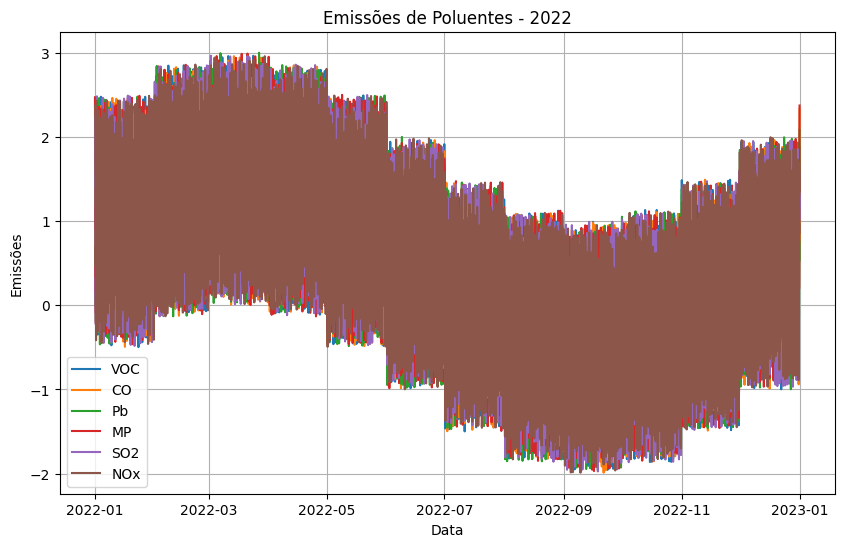

<Figure size 640x480 with 0 Axes>

Figura salva em: D:/ENS5173_01/seasonal_data\Distribuicao_anual_emissoes.png


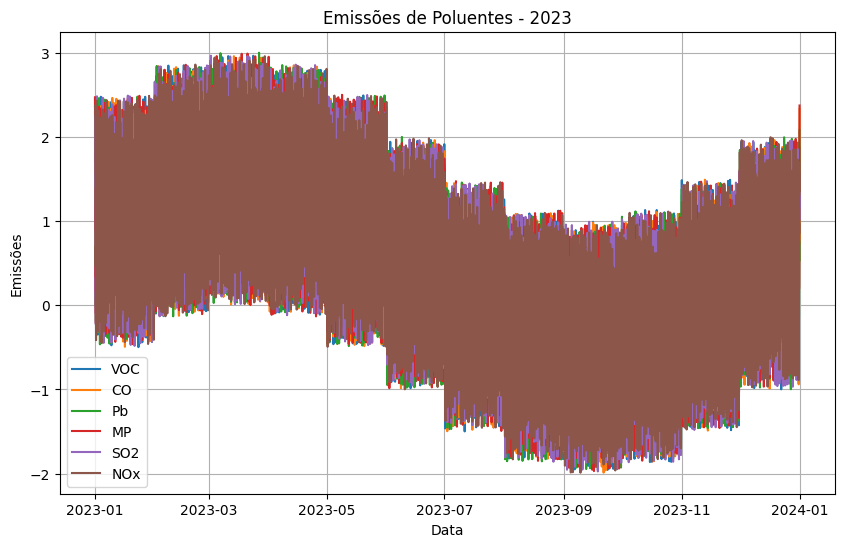

<Figure size 640x480 with 0 Axes>

Figura salva em: D:/ENS5173_01/seasonal_data\Distribuicao_anual_emissoes.png


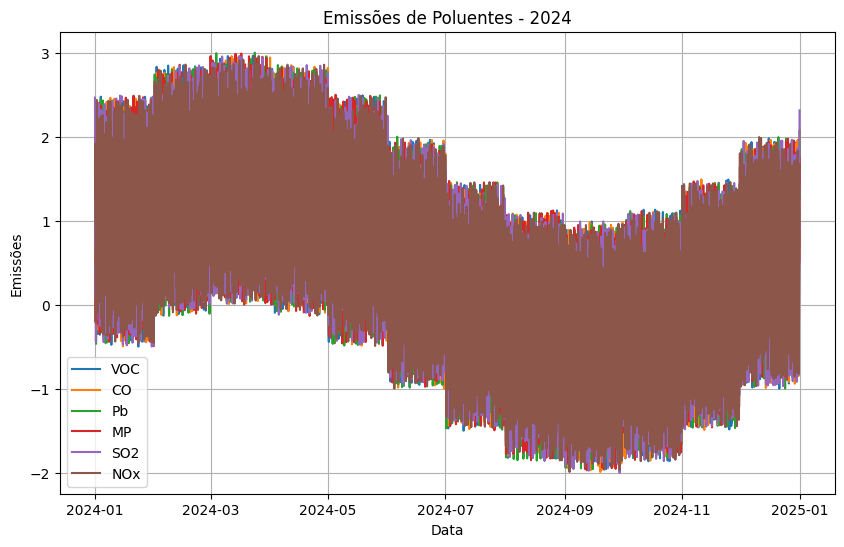

<Figure size 640x480 with 0 Axes>

Figura salva em: D:/ENS5173_01/seasonal_data\Distribuicao_anual_emissoes.png


In [11]:
# sazonalidade com meus dados de emissoes  anual

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_emissions_data(path, year):
    # Criando um intervalo de datas para o ano especificado
    dates = pd.date_range(start=str(year), end=str(year+1), freq='h')    
    # Criando um DataFrame com as datas
    df = pd.DataFrame({'datetime': dates})
    
    # Adicionando colunas para ano, mês, dia e hora
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    
    # Criando colunas para as emissões de VOC, CO, Pb, MP, SO2 e NOx com valores aleatórios
    np.random.seed(0)  # Para garantir que os resultados sejam reproduzíveis
    pollutants = ['VOC', 'CO', 'Pb', 'MP', 'SO2', 'NOx']
    for pollutant in pollutants:
        df[pollutant] = np.random.rand(len(df))
    
    # Adicionando uma componente sazonal às emissões
    tt = np.arange(0, len(df), 1)
    for pollutant in pollutants:
        df[pollutant] += np.sin(2 * np.pi * df['month'] / 12) + np.cos(2 * np.pi * df['hour'] / 24)
    
    # Salvando os dados em um arquivo CSV
    filename = f"{path}/emissions_data_{year}.csv"
    df.to_csv(filename, index=False)
    
    # Plotando as emissões ao longo do tempo
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.plot(df['datetime'], df[pollutant], label=pollutant)
    plt.title(f'Emissões de Poluentes - {year}')
    plt.xlabel('Data')
    plt.ylabel('Emissões')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{path}/emissions_plot_{year}.png")
    plt.show()

    # Salvar a figura
    caminho_figura = os.path.join(path, 'Distribuicao_anual_emissoes.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")

# Exemplo de uso
path = "D:/ENS5173_01/seasonal_data"
for year in range(2020, 2025):
    generate_emissions_data(path, year)


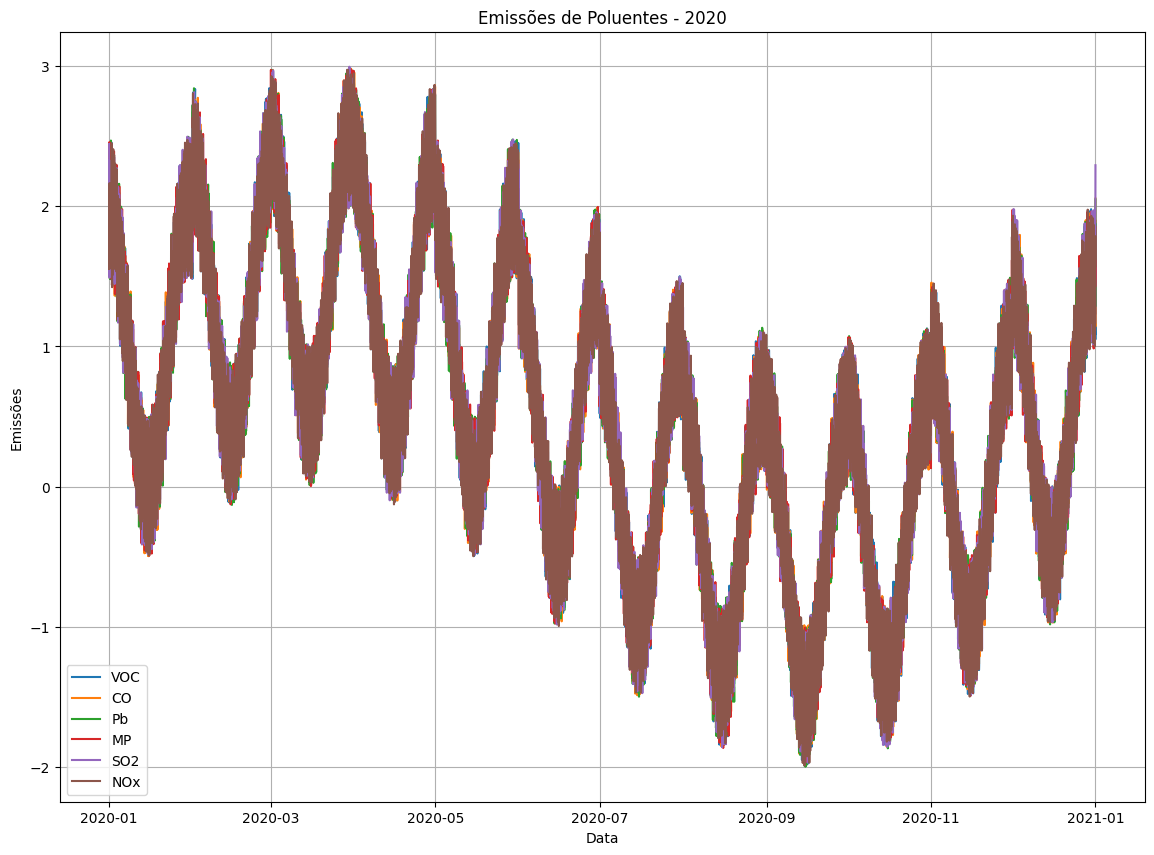

Figura salva em: D:/ENS5173_01/figures\EMISSOES_sazonais_2020.png


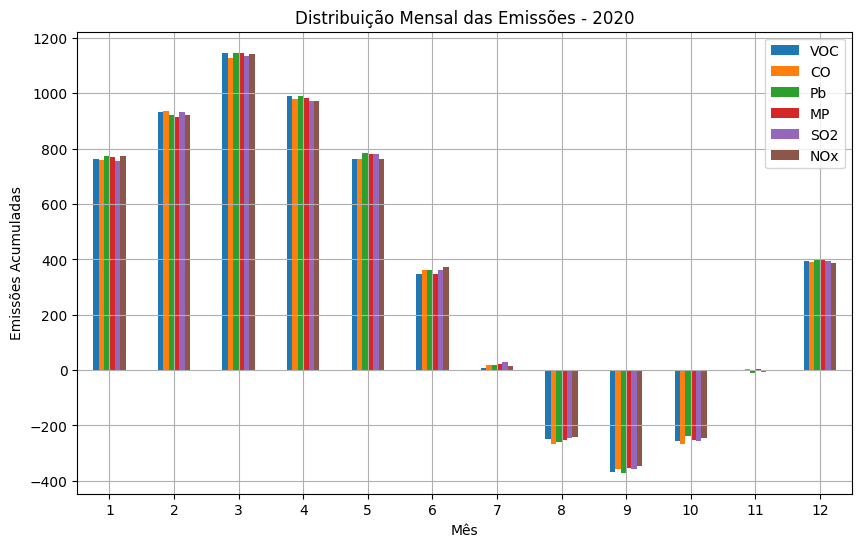

Figura salva em: D:/ENS5173_01/figures\Distribuicao_mensal_emissoes_2020.png


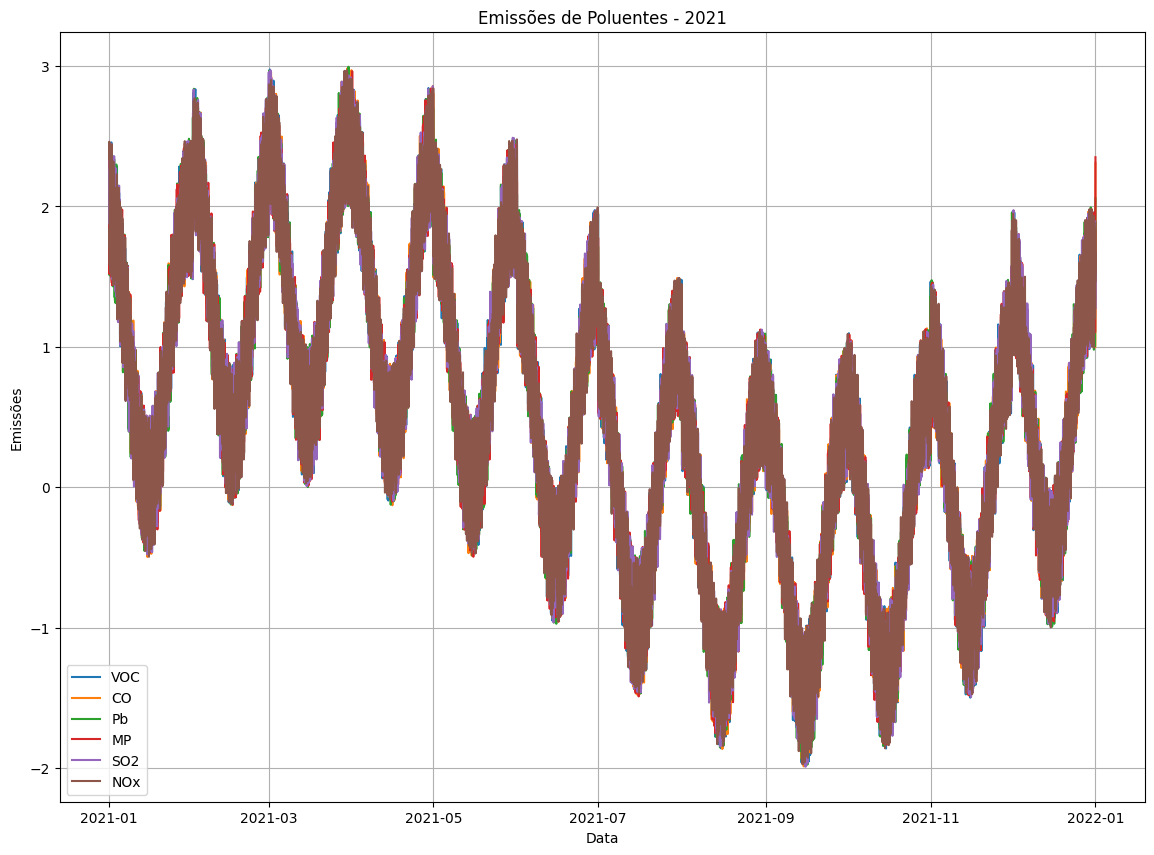

Figura salva em: D:/ENS5173_01/figures\EMISSOES_sazonais_2021.png


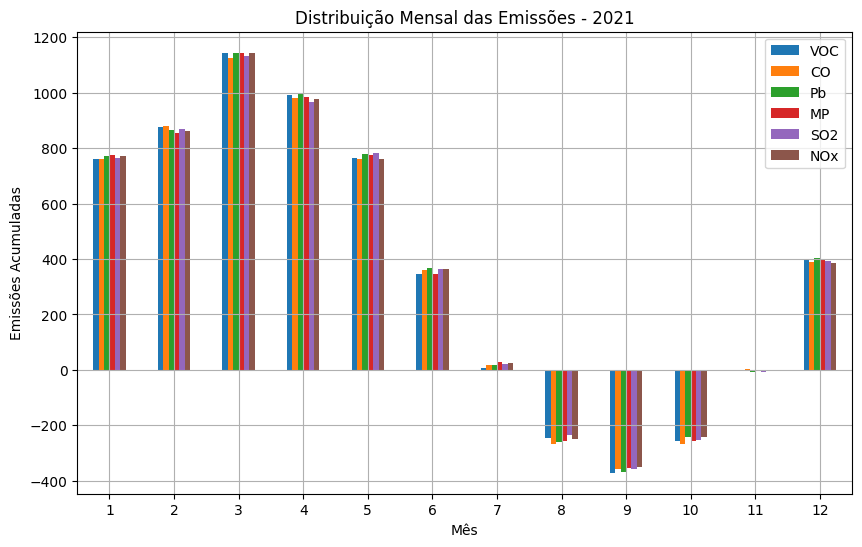

Figura salva em: D:/ENS5173_01/figures\Distribuicao_mensal_emissoes_2021.png


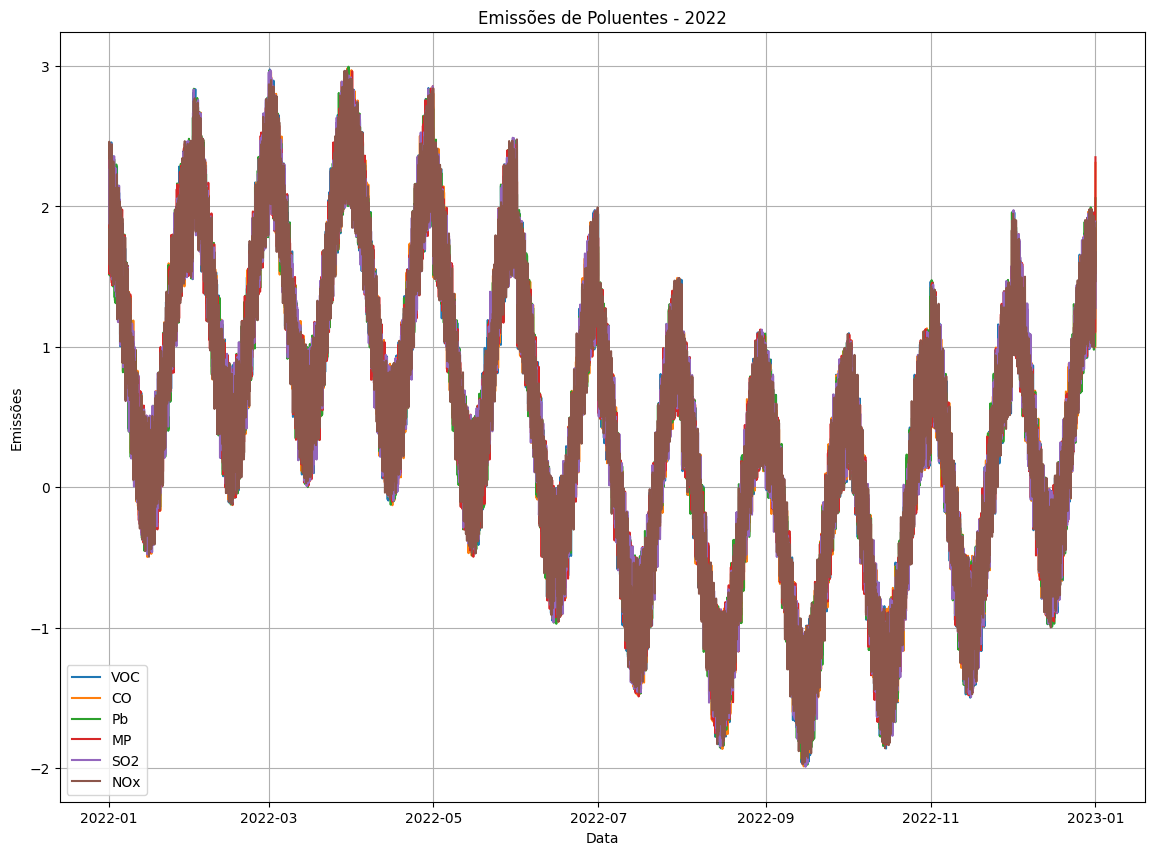

Figura salva em: D:/ENS5173_01/figures\EMISSOES_sazonais_2022.png


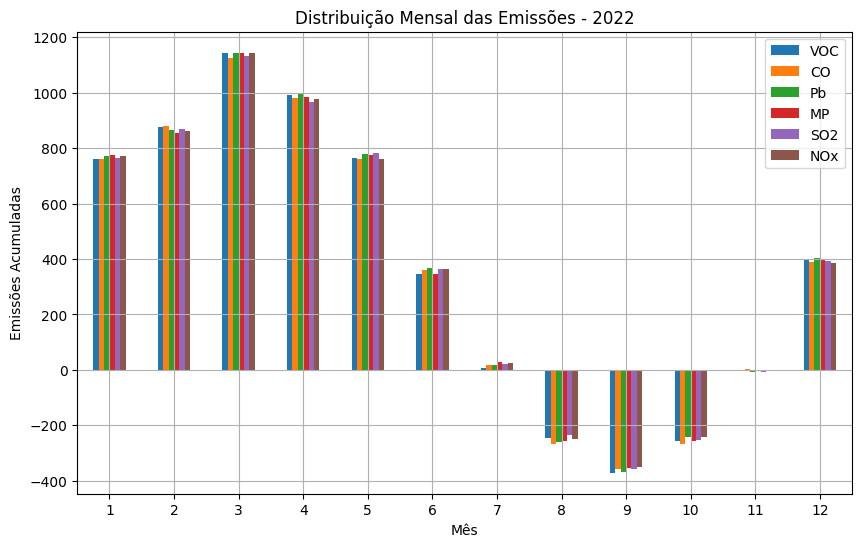

Figura salva em: D:/ENS5173_01/figures\Distribuicao_mensal_emissoes_2022.png


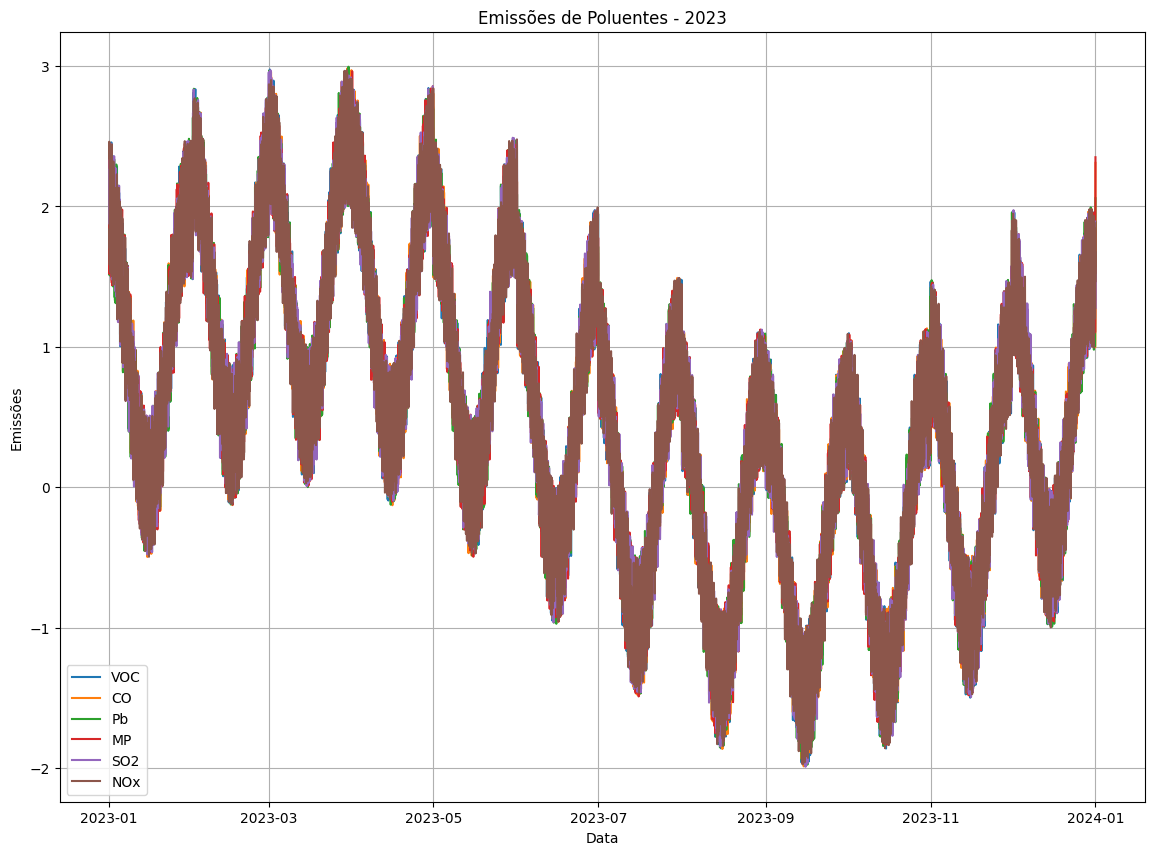

Figura salva em: D:/ENS5173_01/figures\EMISSOES_sazonais_2023.png


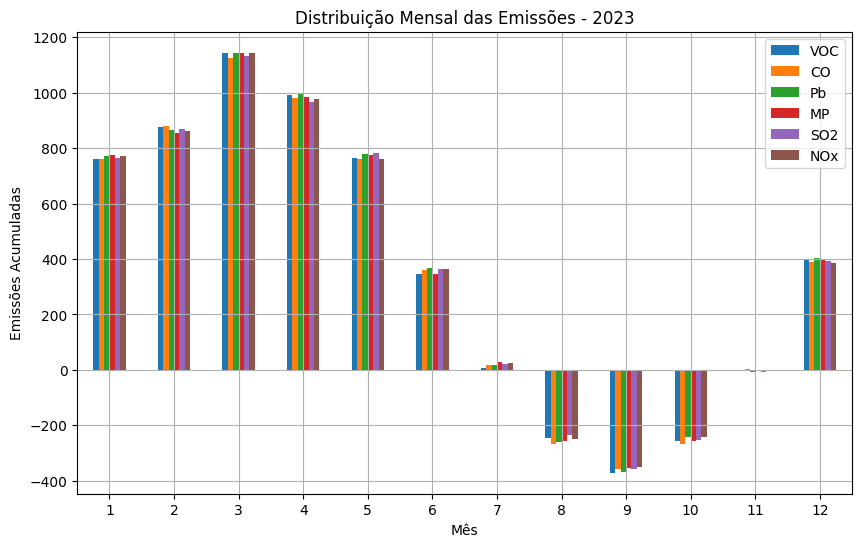

Figura salva em: D:/ENS5173_01/figures\Distribuicao_mensal_emissoes_2023.png


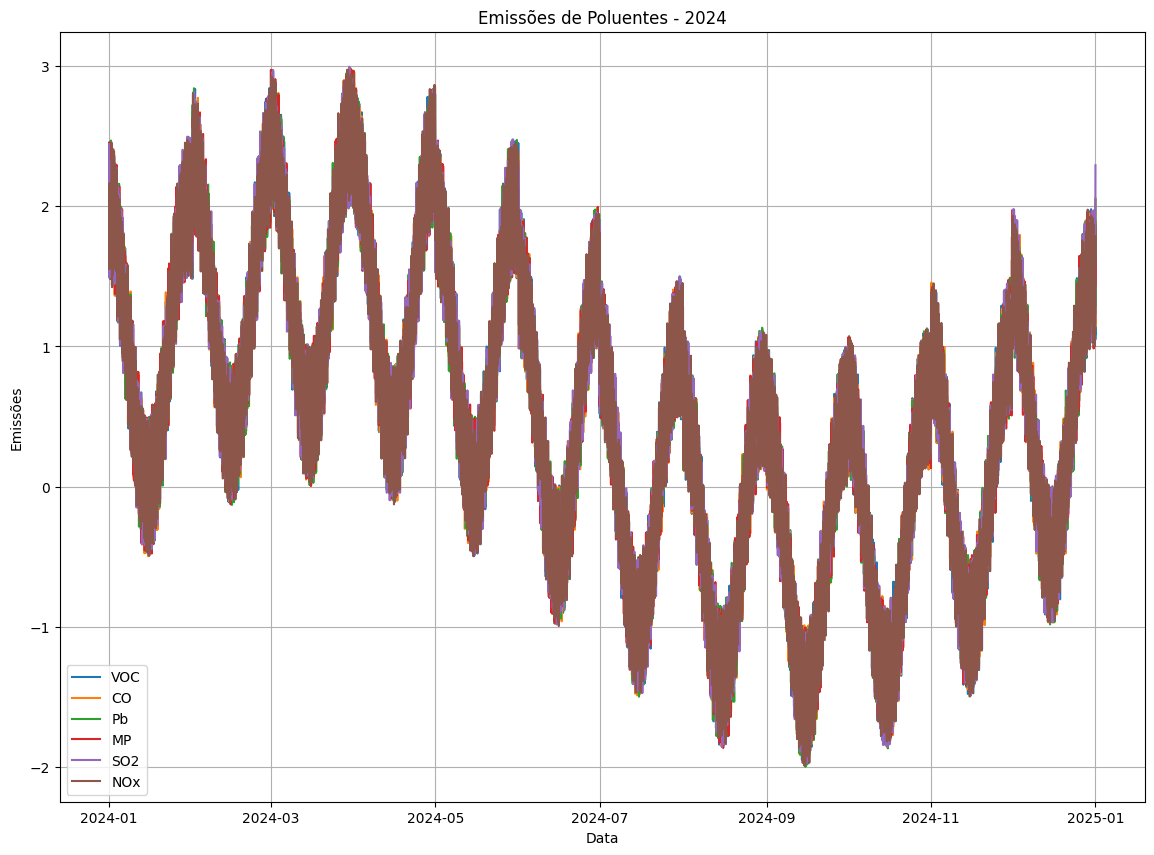

Figura salva em: D:/ENS5173_01/figures\EMISSOES_sazonais_2024.png


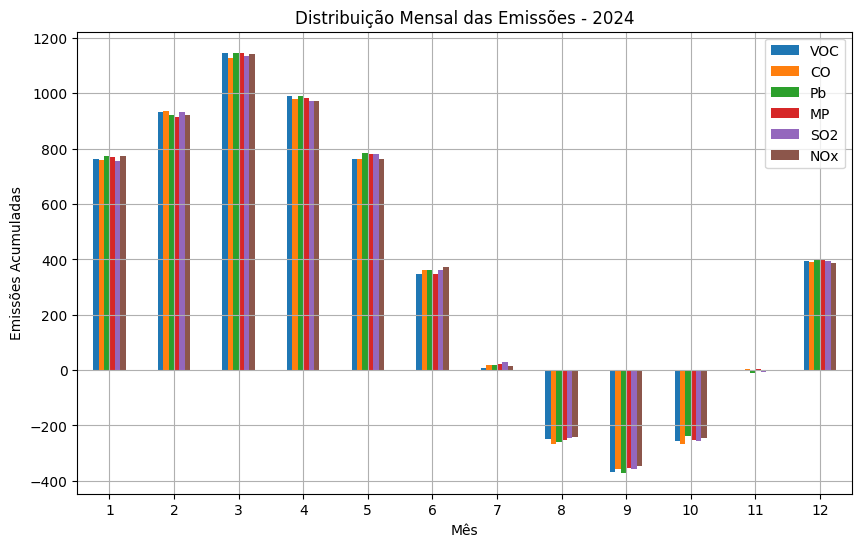

Figura salva em: D:/ENS5173_01/figures\Distribuicao_mensal_emissoes_2024.png


In [13]:
#sazonalidade de emissoes mensais 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_emissions_data(path, year):
    # Criando um intervalo de datas para o ano especificado
    dates = pd.date_range(start=str(year), end=str(year+1), freq='h')    
    # Criando um DataFrame com as datas
    df = pd.DataFrame({'datetime': dates})
    
    # Adicionando colunas para ano, mês, dia e hora
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    
    # Criando colunas para as emissões de VOC, CO, Pb, MP, SO2 e NOx com valores aleatórios
    np.random.seed(0)  # Para garantir que os resultados sejam reproduzíveis
    pollutants = ['VOC', 'CO', 'Pb', 'MP', 'SO2', 'NOx']
    for pollutant in pollutants:
        df[pollutant] = np.random.rand(len(df))
    
    # Adicionando uma componente sazonal às emissões
    for pollutant in pollutants:
        df[pollutant] += np.sin(2 * np.pi * df['month'] / 12) + np.cos(2 * np.pi * df['day'] / 30)
    
    # Salvando os dados em um arquivo CSV
    filename = f"{path}/emissions_data_{year}.csv"
    df.to_csv(filename, index=False)
    
    # Plotando as emissões ao longo do tempo
    plt.figure(figsize=(14, 10))
    for pollutant in pollutants:
        plt.plot(df['datetime'], df[pollutant], label=pollutant)
    plt.title(f'Emissões de Poluentes - {year}')
    plt.xlabel('Data')
    plt.ylabel('Emissões')
    plt.legend()
    plt.grid(True)
    # Salvar a figura
    caminho_figura = os.path.join(path, f'EMISSOES_sazonais_{year}.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")
    
    # Plotando a distribuição das emissões ao longo dos meses
    monthly_emissions = df.groupby('month')[pollutants].sum()  # Sum only emissions columns
    monthly_emissions.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribuição Mensal das Emissões - {year}')
    plt.xlabel('Mês')
    plt.ylabel('Emissões Acumuladas')
    plt.xticks(rotation=0)
    plt.grid(True)
    # Salvar a figura
    caminho_figura = os.path.join(path, f'Distribuicao_mensal_emissoes_{year}.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")

# Exemplo de uso
path = "D:/ENS5173_01/figures"
for year in range(2020, 2025):
    generate_emissions_data(path, year)


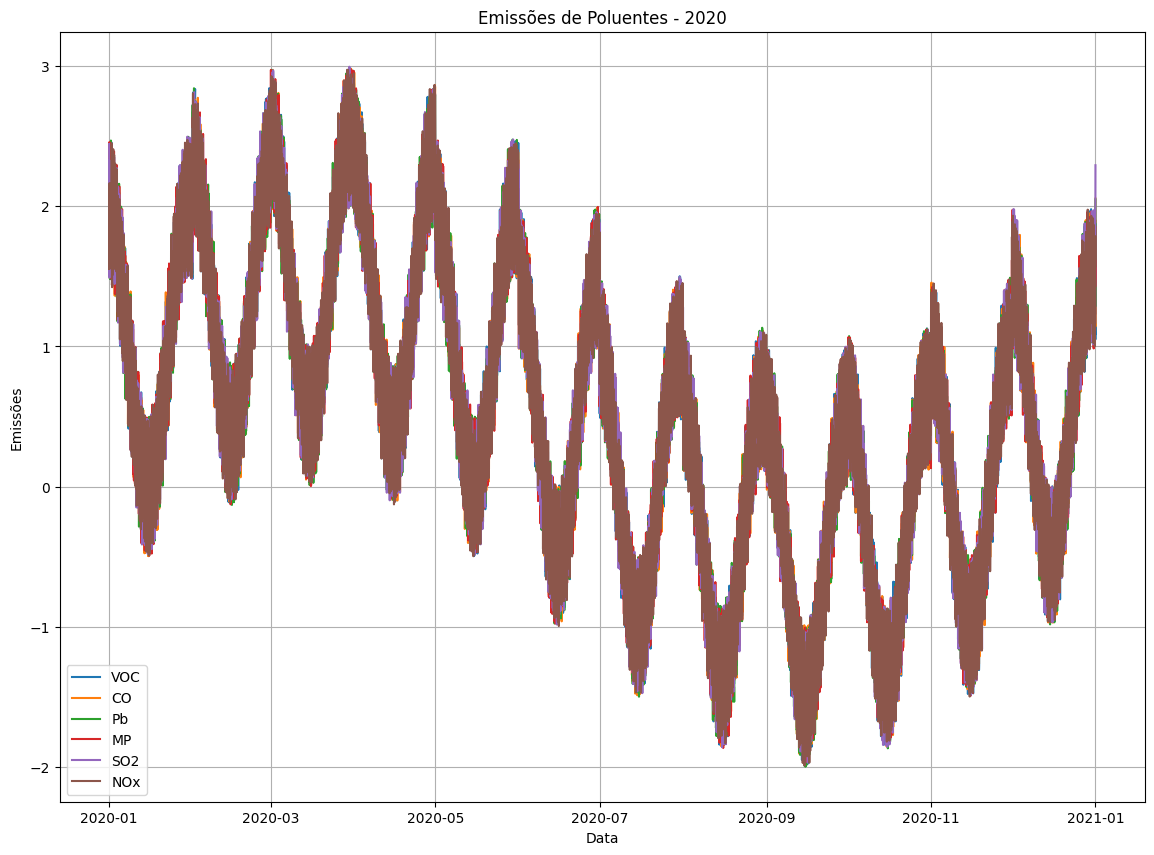

Figura salva em: D:/ENS5173_01/figures\EMISSOES_sazonais_2020.png


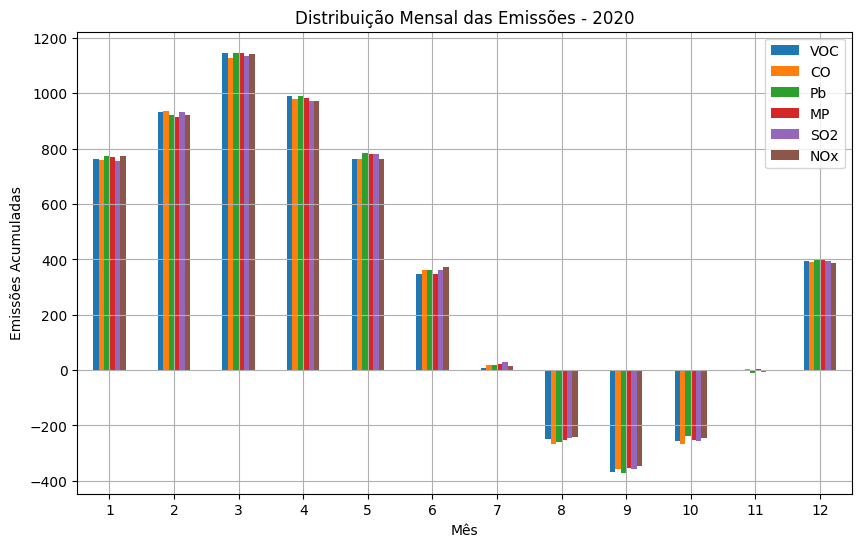

Figura salva em: D:/ENS5173_01/figures\Distribuicao_mensal_emissoes_2020.png
Min Months: VOC  min     2020
     mean    2020
     max     2021
CO   min     2020
     mean    2020
     max     2021
Pb   min     2020
     mean    2020
     max     2021
MP   min     2020
     mean    2020
     max     2021
SO2  min     2020
     mean    2020
     max     2021
NOx  min     2020
     mean    2020
     max     2021
dtype: int32
Mean Months: VOC  min     2020
     mean    2020
     max     2021
CO   min     2020
     mean    2020
     max     2021
Pb   min     2020
     mean    2020
     max     2021
MP   min     2020
     mean    2020
     max     2021
SO2  min     2020
     mean    2020
     max     2021
NOx  min     2020
     mean    2020
     max     2021
dtype: int32
Max Months: VOC  min     2021
     mean    2021
     max     2020
CO   min     2021
     mean    2021
     max     2020
Pb   min     2021
     mean    2021
     max     2020
MP   min     2021
     mean    2021
     max     2

ValueError: month must be in 1..12

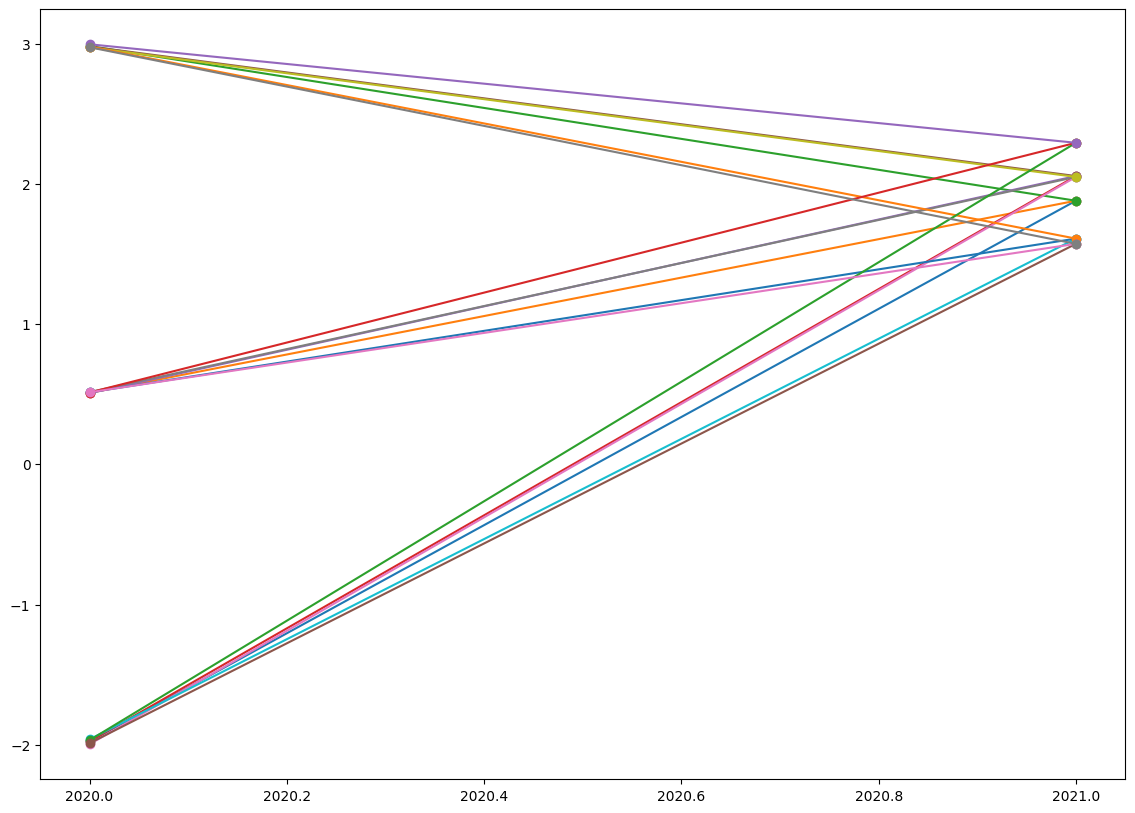

In [24]:
# VARIACOES ANUAL COM EMISSOES MINIMAS . MEDIAS . MAXIMAS DURANTE O 12 MESES 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_emissions_data(path, year):
    # Criando um intervalo de datas para o ano especificado
    dates = pd.date_range(start=str(year), end=str(year+1), freq='h')    
    # Criando um DataFrame com as datas
    df = pd.DataFrame({'datetime': dates})
    
    # Adicionando colunas para ano, mês, dia e hora
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    
    # Criando colunas para as emissões de VOC, CO, Pb, MP, SO2 e NOx com valores aleatórios
    np.random.seed(0)  # Para garantir que os resultados sejam reproduzíveis
    pollutants = ['VOC', 'CO', 'Pb', 'MP', 'SO2', 'NOx']
    for pollutant in pollutants:
        df[pollutant] = np.random.rand(len(df))
    
    # Adicionando uma componente sazonal às emissões
    for pollutant in pollutants:
        df[pollutant] += np.sin(2 * np.pi * df['month'] / 12) + np.cos(2 * np.pi * df['day'] / 30)
    
    # Salvando os dados em um arquivo CSV
    filename = f"{path}/emissions_data_{year}.csv"
    df.to_csv(filename, index=False)
    
    # Plotando as emissões ao longo do tempo
    plt.figure(figsize=(14, 10))
    for pollutant in pollutants:
        plt.plot(df['datetime'], df[pollutant], label=pollutant)
    plt.title(f'Emissões de Poluentes - {year}')
    plt.xlabel('Data')
    plt.ylabel('Emissões')
    plt.legend()
    plt.grid(True)
    # Salvar a figura
    caminho_figura = os.path.join(path, f'EMISSOES_sazonais_{year}.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")
    
    # Plotando a distribuição das emissões ao longo dos meses
    monthly_emissions = df.groupby('month')[pollutants].sum()  # Sum only emissions columns
    monthly_emissions.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribuição Mensal das Emissões - {year}')
    plt.xlabel('Mês')
    plt.ylabel('Emissões Acumuladas')
    plt.xticks(rotation=0)
    plt.grid(True)
    # Salvar a figura
    caminho_figura = os.path.join(path, f'Distribuicao_mensal_emissoes_{year}.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")
    
    # Calculando as estatísticas resumidas (mínimo, média e máximo) de cada poluente ao longo de 365 dias
    yearly_stats = df.groupby('year')[pollutants].agg(['min', 'mean', 'max'])
    
    # Identificando em qual mês os valores mínimos, médios e máximos ocorrem para cada poluente
    min_months = yearly_stats.idxmin(axis=0)
    mean_months = yearly_stats.idxmin(axis=0)
    max_months = yearly_stats.idxmax(axis=0)
    
    print("Min Months:", min_months)  # Depuração
    print("Mean Months:", mean_months)  # Depuração
    print("Max Months:", max_months)  # Depuração
    
    # Plotando as estatísticas resumidas para cada poluente
    plt.figure(figsize=(14, 10))
    for pollutant in pollutants:
        plt.plot(yearly_stats.index, yearly_stats[pollutant]['min'], marker='o', linestyle='-', label=f'{pollutant} Mínimo')
        plt.plot(yearly_stats.index, yearly_stats[pollutant]['mean'], marker='o', linestyle='-', label=f'{pollutant} Média')
        plt.plot(yearly_stats.index, yearly_stats[pollutant]['max'], marker='o', linestyle='-', label=f'{pollutant} Máximo')
    
    # Adicionando anotações para indicar o mês onde ocorrem os valores mínimos, médios e máximos
    for i, pollutant in enumerate(pollutants):
        for j, month_int in enumerate(min_months[pollutant]):
            month_date = pd.Timestamp(year, int(month_int), 1)  # Convertendo para data completa
            plt.annotate(f'Mín: {month_date.strftime("%B")}', (yearly_stats.index[j], yearly_stats[pollutant]['min'][j]), textcoords="offset points", xytext=(-10,10), ha='center')
            plt.annotate(f'Méd: {month_date.strftime("%B")}', (yearly_stats.index[j], yearly_stats[pollutant]['mean'][j]), textcoords="offset points", xytext=(-10,10), ha='center')
            plt.annotate(f'Máx: {month_date.strftime("%B")}', (yearly_stats.index[j], yearly_stats[pollutant]['max'][j]), textcoords="offset points", xytext=(-10,10), ha='center')
    
    plt.title(f'Emissões de Poluentes ao Longo do Ano - {year}')
    plt.xlabel('Ano')
    plt.ylabel('Emissões (kg/segundo)')
    plt.legend()
    plt.grid(True)
    # Salvar a figura
    caminho_figura = os.path.join(path, f'Emissões_ano_{year}.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")

# Exemplo de uso
path = "D:/ENS5173_01/figures"
for year in range(2020, 2025):
    generate_emissions_data(path, year)


In [35]:
#VERIFICANDO EMISSOES E SAZONALIDADE ( TENTANDO CORRIGIR )


##Definir os dados de emissão de acordo com a tabela fornecida.
##Gerar a sazonalidade aleatória para cada poluente ao longo de um ano.
##Multiplicar os valores de emissão de poluentes em kg/megagrama por 800 mil toneladas/ano para converter para kg/segundo.
##Calcular os mínimos, médios e máximos de emissão para cada poluente ao longo de um ano.
##Identificar em quais meses esses valores ocorrem.
##Plotar os gráficos mostrando as emissões de cada poluente ao longo do ano, bem como os mínimos, médios e máximos.

import pandas as pd
import numpy as np

# Dados fornecidos
data = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático',
                 'Flat', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático',
                 'Pressionado e soprado', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático',
                 'Formação e acabamento', 'Container', 'Pressionado e soprado', 'Vidro de chumbo'],
    'Sigla': ['MF', 'UC', 'LBE', 'SV', 'FM', 'PE', 'FL', 'UC', 'LBE', 'SV', 'FM', 'PE', 'PS', 'UC', 'LBE', 'SV', 'FM', 'PE', 'FA', 'CN', 'PS', 'VC'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, np.nan, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 4.4, 4.5, np.nan, np.nan],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, np.nan, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, np.nan, np.nan, np.nan, np.nan],
    'Pb (kg/Mg)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 2.5, np.nan, np.nan, np.nan],
    'MP (kg/Mg)': [0.7, 1, 0.4, np.nan, np.nan, np.nan, 1, 1, 0.5, np.nan, np.nan, np.nan, 8.4, 4.2, 0.5, 0.1, 0.1, 0.1, np.nan, np.nan, np.nan, np.nan],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7, 1.5, 1.5, 0.8, 0.1, 1.5, 1.5, 2.8, 1.3, 0.1, 2.8, 2.8, 2.8, np.nan, np.nan, np.nan, np.nan],
    'NOx (kg/Mg)': [3.1, 4, 3.1, 3.1, 3.1, 3.1, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, np.nan, np.nan, np.nan, np.nan]
}

# Verificar os comprimentos dos arrays
lengths = {key: len(value) for key, value in data.items()}
print(lengths)


{'Processo': 22, 'Sigla': 22, 'VOC (kg/Mg)': 22, 'CO (kg/Mg)': 22, 'Pb (kg/Mg)': 21, 'MP (kg/Mg)': 22, 'SO2 (kg/Mg)': 22, 'NOx (kg/Mg)': 22}


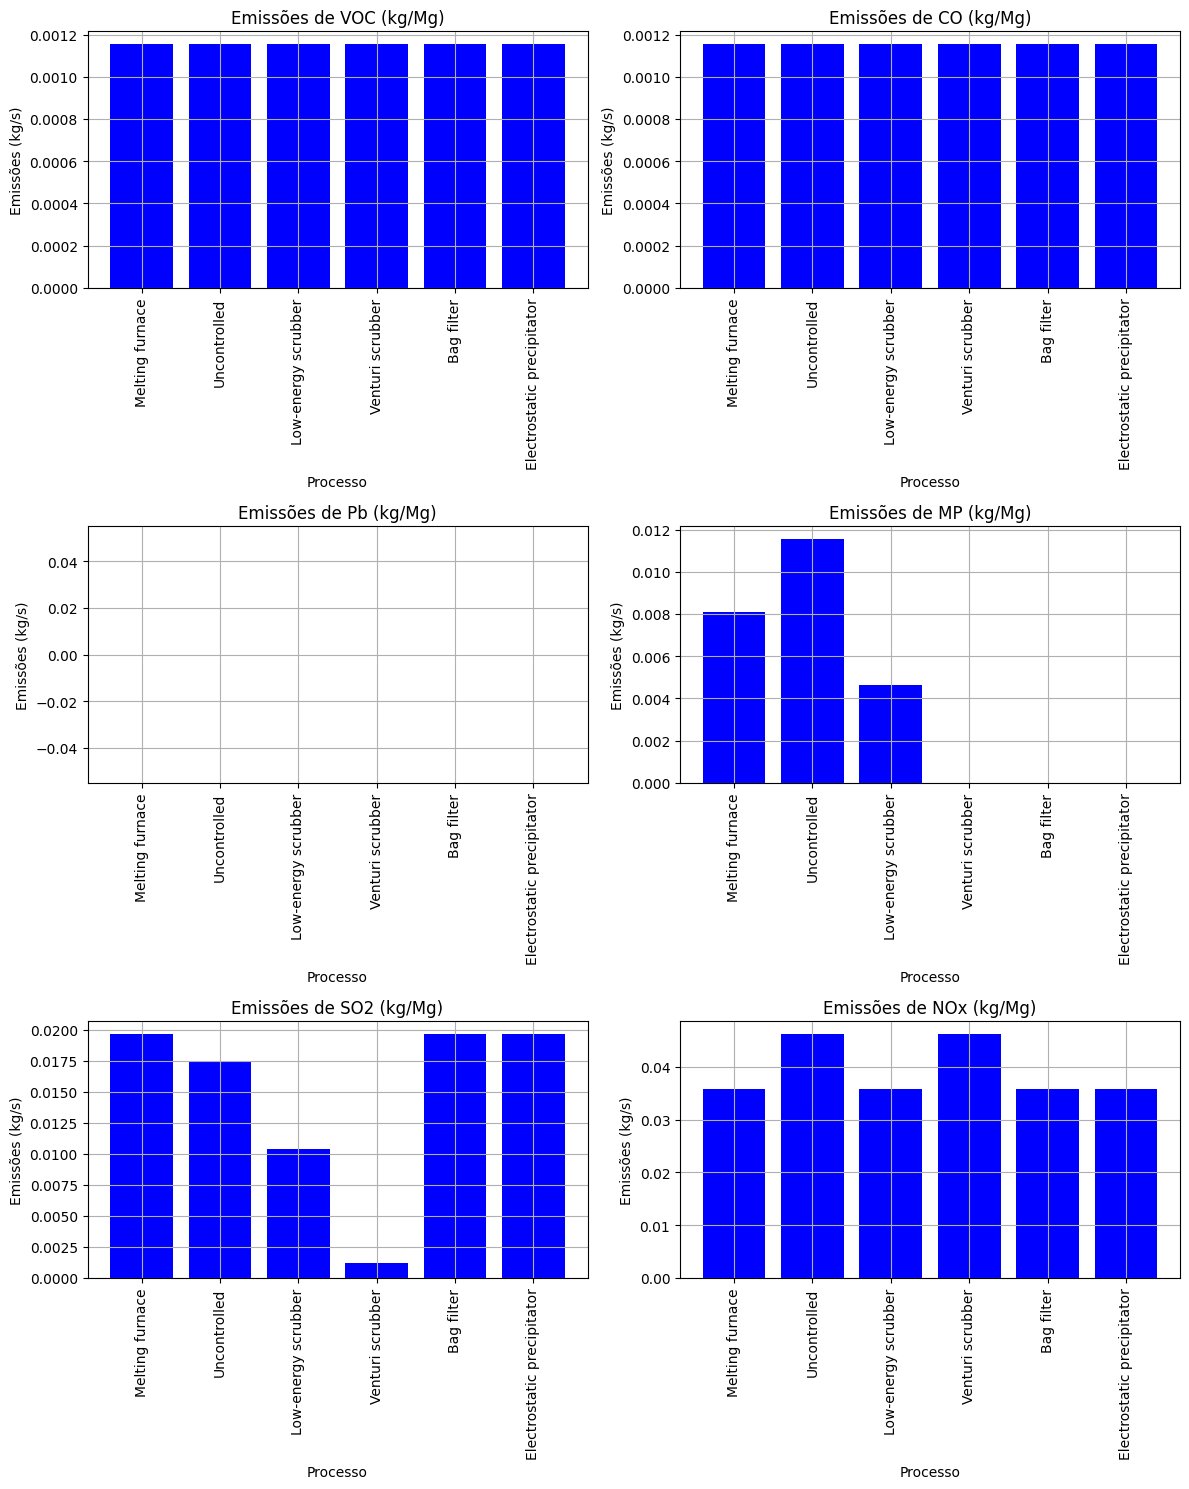

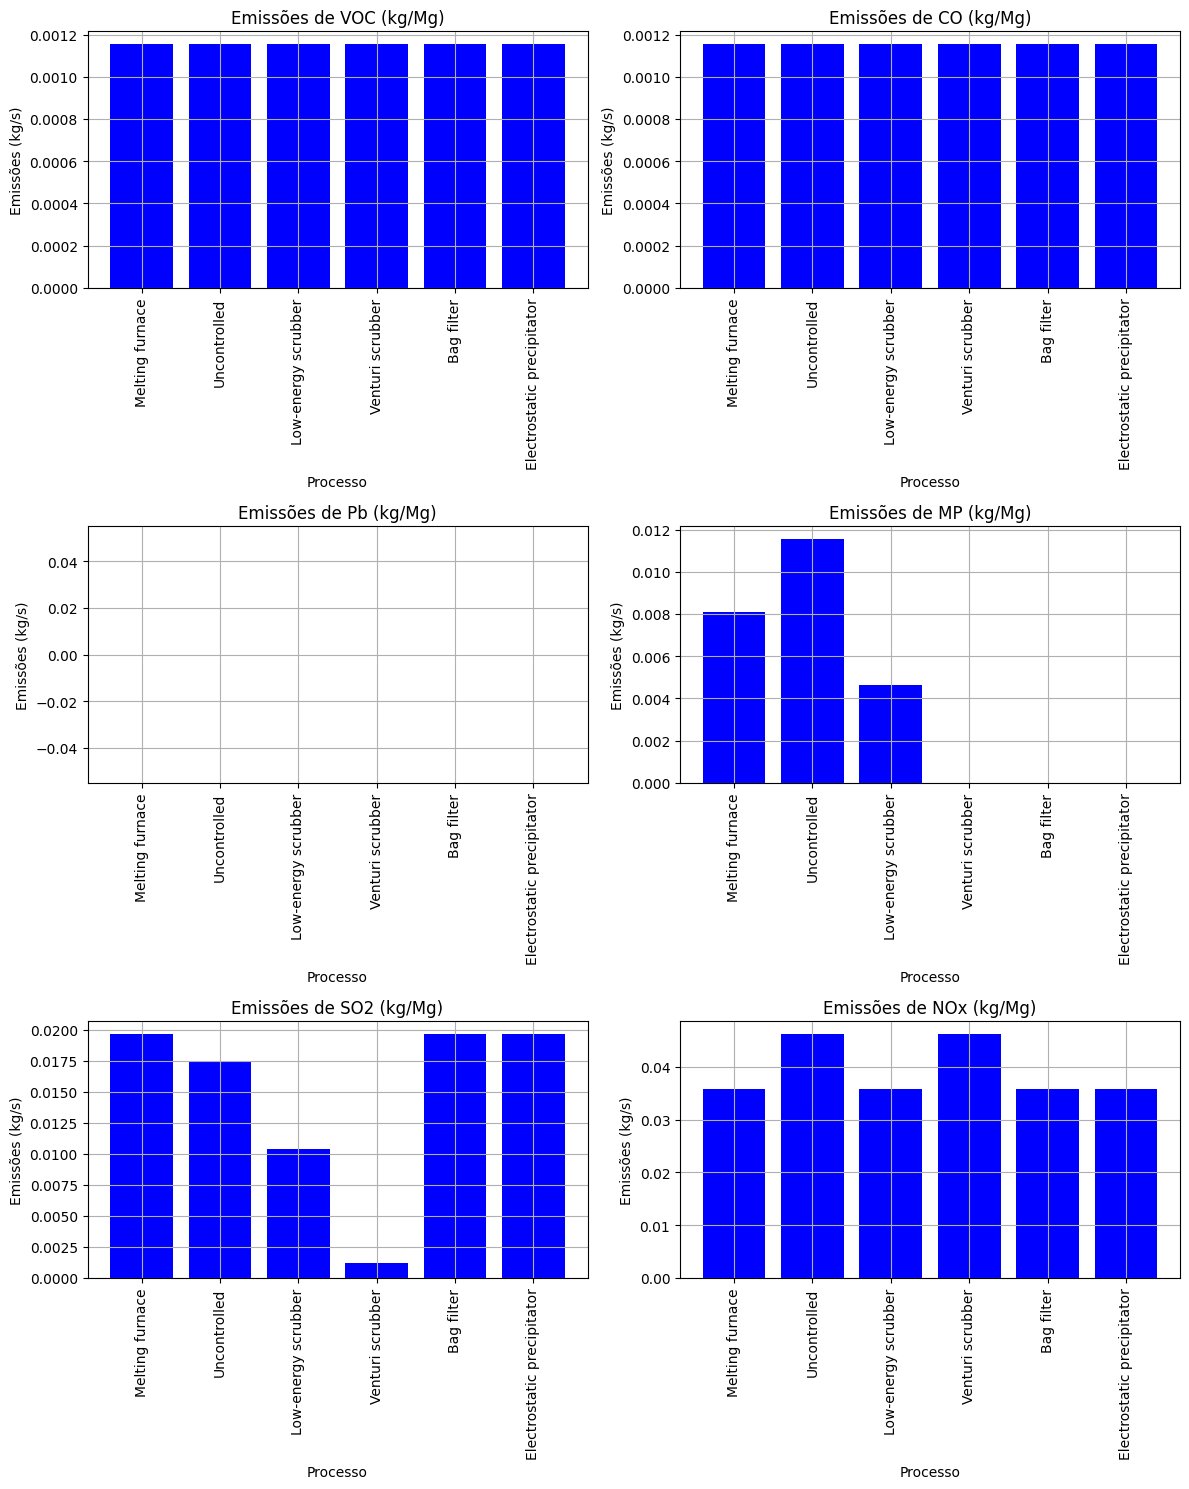

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Low-energy scrubber', 'Venturi scrubber', 'Bag filter', 'Electrostatic precipitator'],
    'Sigla': ['MF', 'UC', 'LES', 'VS', 'BF', 'EP'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df.iloc[:, 2:] *= (1000) / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Definindo os processos
processos = df['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Exportando o gráfico como um arquivo PNG
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/poluentes_e_processos.png')

plt.tight_layout()
plt.show()


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Função para gerar dados sazonais
def generate_seasonal_data(months, base_value, amplitude, phase_shift=0):
    """
    Gera dados sazonais com base em uma função seno.

    Parâmetros:
    - months: lista de meses (de 1 a 12)
    - base_value: valor base para a função seno
    - amplitude: amplitude da função seno
    - phase_shift: deslocamento de fase da função seno (em radianos)

    Retorna:
    - Lista com os valores sazonais para cada mês
    """
    return [base_value + amplitude * np.sin((2 * np.pi / 12) * (m - 1 - phase_shift)) for m in months]

# Definindo os meses do ano
months = np.arange(1, 13)

# Parâmetros para os dados sazonais (valores hipotéticos)
base_value = 100  # Valor base das emissões
amplitude = 20    # Amplitude das variações sazonais
phase_shift = 0   # Deslocamento de fase (opcional)

# Gerar dados sazonais para cada poluente
voc_seasonal = generate_seasonal_data(months, base_value, amplitude, phase_shift)
co_seasonal = generate_seasonal_data(months, base_value, amplitude, phase_shift)
pb_seasonal = generate_seasonal_data(months, base_value, amplitude, phase_shift)
mp_seasonal = generate_seasonal_data(months, base_value, amplitude, phase_shift)
so2_seasonal = generate_seasonal_data(months, base_value, amplitude, phase_shift)
nox_seasonal = generate_seasonal_data(months, base_value, amplitude, phase_shift)

# Criar DataFrame com os dados sazonais
data = {
    'Month': months,
    'VOC (kg/Mg)': voc_seasonal,
    'CO (kg/Mg)': co_seasonal,
    'Pb (kg/Mg)': pb_seasonal,
    'MP (kg/Mg)': mp_seasonal,
    'SO2 (kg/Mg)': so2_seasonal,
    'NOx (kg/Mg)': nox_seasonal
}
df_seasonal = pd.DataFrame(data)

# Exibir os primeiros registros do DataFrame
print(df_seasonal.head())


   Month  VOC (kg/Mg)  CO (kg/Mg)  Pb (kg/Mg)  MP (kg/Mg)  SO2 (kg/Mg)  \
0      1   100.000000  100.000000  100.000000  100.000000   100.000000   
1      2   110.000000  110.000000  110.000000  110.000000   110.000000   
2      3   117.320508  117.320508  117.320508  117.320508   117.320508   
3      4   120.000000  120.000000  120.000000  120.000000   120.000000   
4      5   117.320508  117.320508  117.320508  117.320508   117.320508   

   NOx (kg/Mg)  
0   100.000000  
1   110.000000  
2   117.320508  
3   120.000000  
4   117.320508  


Valores Mínimos de Emissão:
VOC (kg/Mg)    80.0
CO (kg/Mg)     80.0
Pb (kg/Mg)     80.0
MP (kg/Mg)     80.0
SO2 (kg/Mg)    80.0
NOx (kg/Mg)    80.0
dtype: float64

Meses dos Valores Mínimos:
VOC (kg/Mg)    10
CO (kg/Mg)     10
Pb (kg/Mg)     10
MP (kg/Mg)     10
SO2 (kg/Mg)    10
NOx (kg/Mg)    10
dtype: int32

Valores Máximos de Emissão:
VOC (kg/Mg)    120.0
CO (kg/Mg)     120.0
Pb (kg/Mg)     120.0
MP (kg/Mg)     120.0
SO2 (kg/Mg)    120.0
NOx (kg/Mg)    120.0
dtype: float64

Meses dos Valores Máximos:
VOC (kg/Mg)    4
CO (kg/Mg)     4
Pb (kg/Mg)     4
MP (kg/Mg)     4
SO2 (kg/Mg)    4
NOx (kg/Mg)    4
dtype: int32

Valores Médios de Emissão:
VOC (kg/Mg)    100.0
CO (kg/Mg)     100.0
Pb (kg/Mg)     100.0
MP (kg/Mg)     100.0
SO2 (kg/Mg)    100.0
NOx (kg/Mg)    100.0
dtype: float64


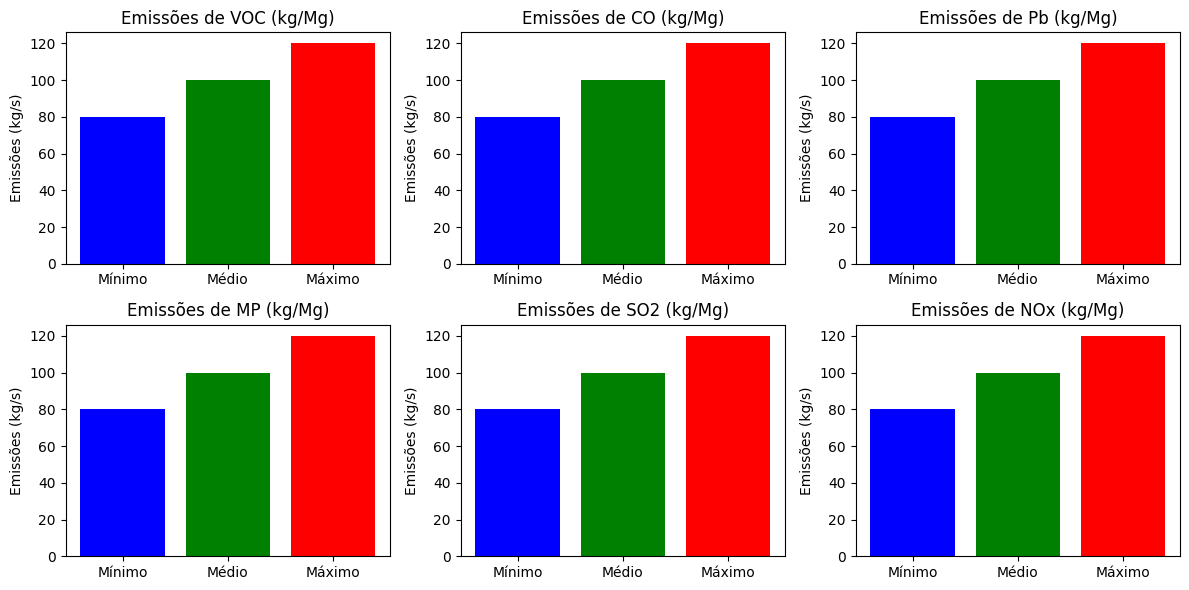

In [56]:
# Calcular os valores mínimo, médio e máximo de emissão para cada poluente ao longo do ano
import matplotlib.pyplot as plt

# Definir os meses como índice
df_seasonal.set_index('Month', inplace=True)

# Calcular os valores mínimo, médio e máximo de emissão para cada poluente ao longo do ano
min_emissions = df_seasonal.min()
max_emissions = df_seasonal.max()
mean_emissions = df_seasonal.mean()

# Identificar em quais meses esses valores ocorrem
min_months = df_seasonal.idxmin()
max_months = df_seasonal.idxmax()

# Exibir os resultados
print("Valores Mínimos de Emissão:")
print(min_emissions)
print("\nMeses dos Valores Mínimos:")
print(min_months)
print("\nValores Máximos de Emissão:")
print(max_emissions)
print("\nMeses dos Valores Máximos:")
print(max_months)
print("\nValores Médios de Emissão:")
print(mean_emissions)

# Plotar gráfico de barras com os valores mínimos, médios e máximos de emissão para cada poluente
plt.figure(figsize=(12, 6))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    plt.bar(['Mínimo', 'Médio', 'Máximo'], [min_emissions[pollutant], mean_emissions[pollutant], max_emissions[pollutant]], color=['blue', 'green', 'red'])
    plt.title(f'Emissões de {pollutant}')
    plt.ylabel('Emissões (kg/s)')

plt.tight_layout()

# Salvar a figura
plt.savefig('D:/ENS5173_01/figures/emissions_statistics.png')

# Exibir a figura
plt.show()



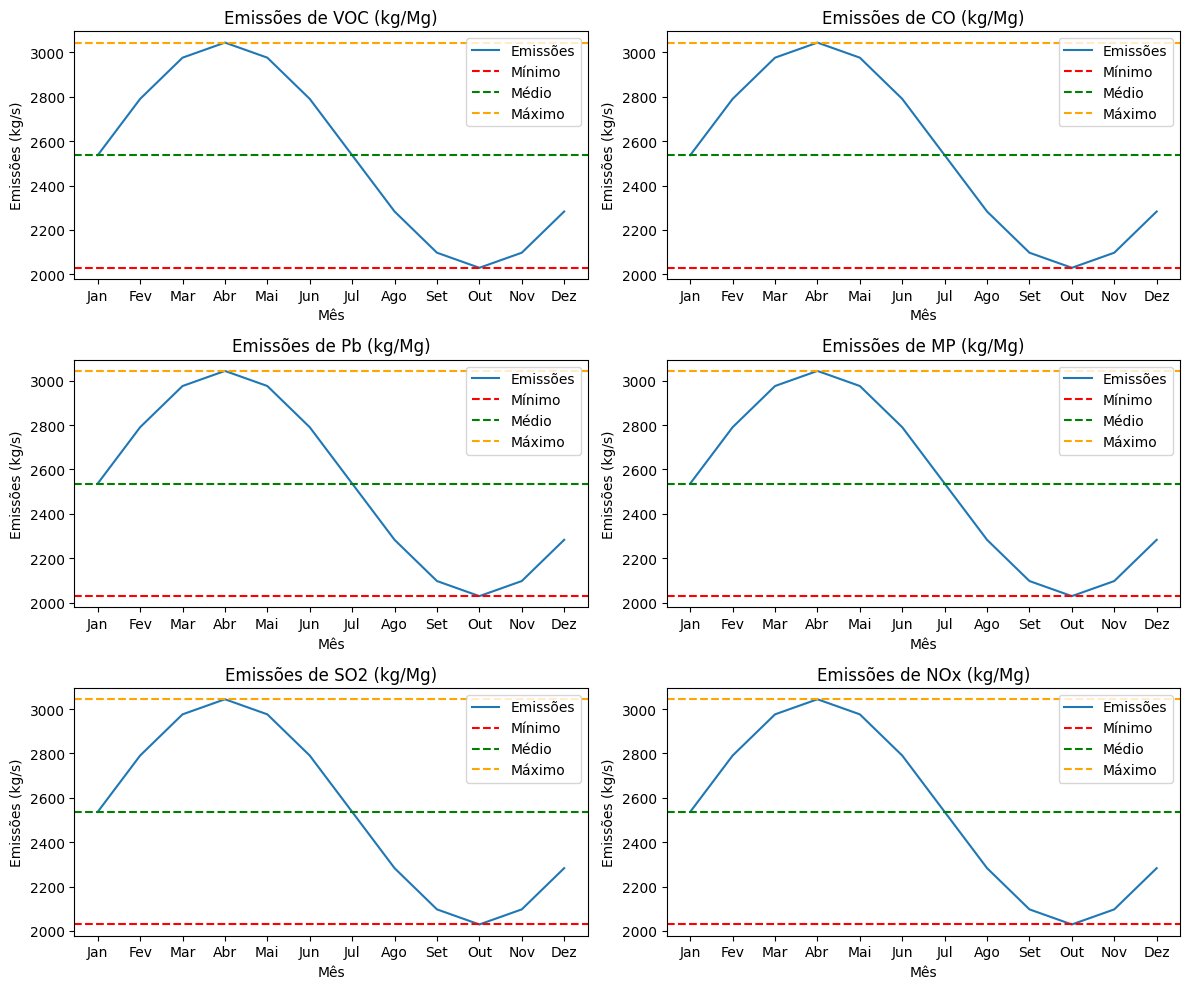

In [49]:
# Plotar os gráficos com os novos valores em kg/segundo
plt.figure(figsize=(12, 10))

# Iterar sobre cada poluente
for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i+1)
    plt.plot(df_kg_per_second['Month'], df_kg_per_second[pollutant], label='Emissões')
    plt.axhline(min_emissions[pollutant] * (800000000 / (365 * 24 * 3600)), color='red', linestyle='--', label='Mínimo')
    plt.axhline(mean_emissions[pollutant] * (800000000 / (365 * 24 * 3600)), color='green', linestyle='--', label='Médio')
    plt.axhline(max_emissions[pollutant] * (800000000 / (365 * 24 * 3600)), color='orange', linestyle='--', label='Máximo')
    plt.title(f'Emissões de {pollutant}')
    plt.xlabel('Mês')
    plt.ylabel('Emissões (kg/s)')
    plt.xticks(months, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.legend()

# Salvar os gráficos no diretório especificado
plt.tight_layout()
plt.savefig('D:/ENS5173_01/figures/emissoes_poluentes_kg_segundo.png')
plt.show()


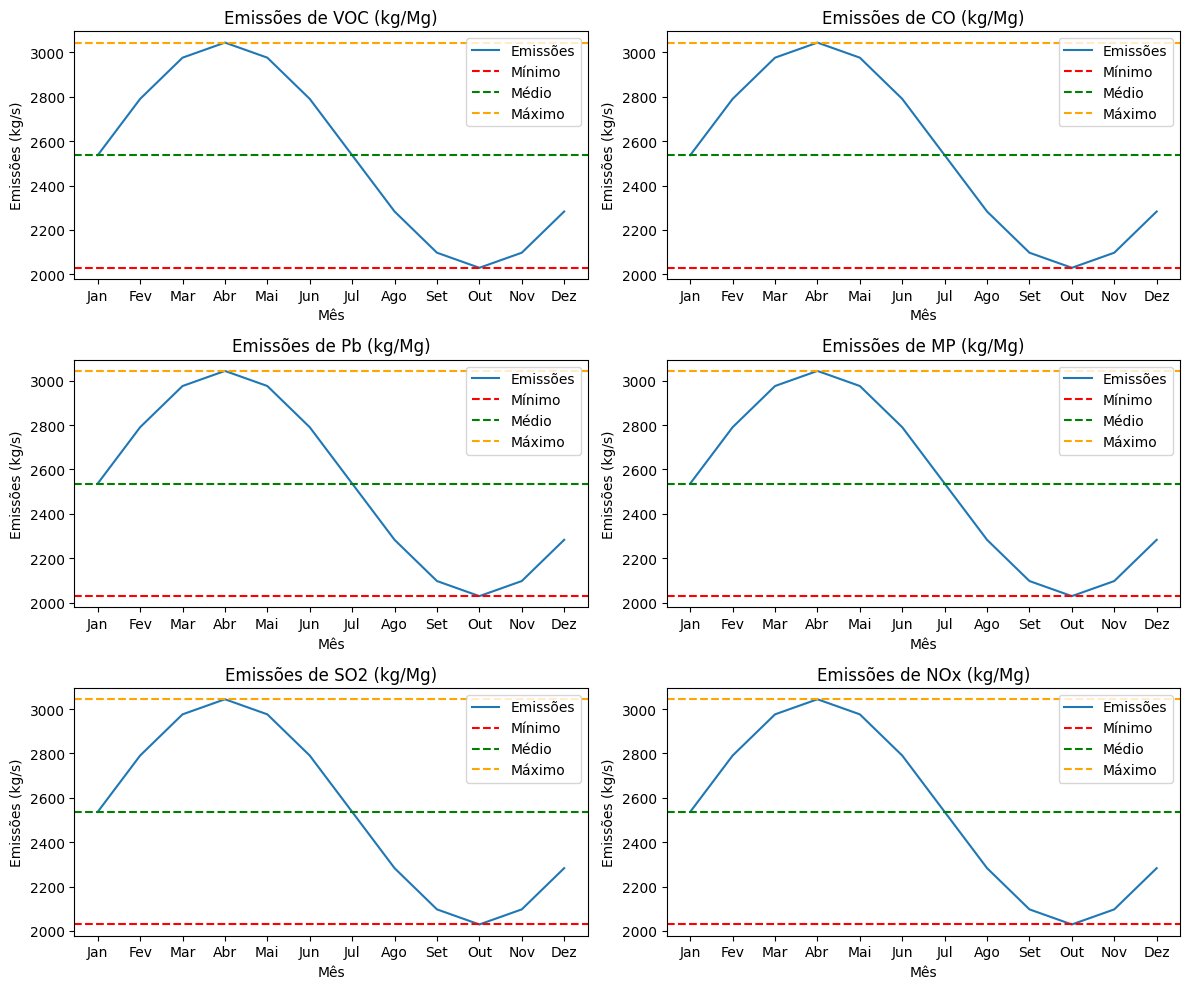

In [50]:
# Plotar os gráficos com os novos valores em kg/segundo
plt.figure(figsize=(12, 10))

# Iterar sobre cada poluente
for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i+1)
    plt.plot(df_kg_per_second['Month'], df_kg_per_second[pollutant], label='Emissões')
    plt.axhline(min_emissions[pollutant] * (800000000 / (365 * 24 * 3600)), color='red', linestyle='--', label='Mínimo')
    plt.axhline(mean_emissions[pollutant] * (800000000 / (365 * 24 * 3600)), color='green', linestyle='--', label='Médio')
    plt.axhline(max_emissions[pollutant] * (800000000 / (365 * 24 * 3600)), color='orange', linestyle='--', label='Máximo')
    plt.title(f'Emissões de {pollutant}')
    plt.xlabel('Mês')
    plt.ylabel('Emissões (kg/s)')
    plt.xticks(months, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.legend()

# Salvar os gráficos no diretório especificado
plt.tight_layout()
plt.savefig('D:/ENS5173_01/figures/emissoes_poluentes_kg_segundo.png')
plt.show()


In [5]:
# Calculando a soma das emissões para cada processo
emissoes_por_processo = emissoes.sum(axis=1)

# Encontrando o processo com a maior emissão
processo_maior_emissao = emissoes_por_processo.idxmax()
maior_emissao = emissoes_por_processo.max()

print(f"O processo com a maior emissão é '{processo_maior_emissao}' com uma emissão total de {maior_emissao:.2f} kg/s.")


O processo com a maior emissão é '1' com uma emissão total de 0.08 kg/s.


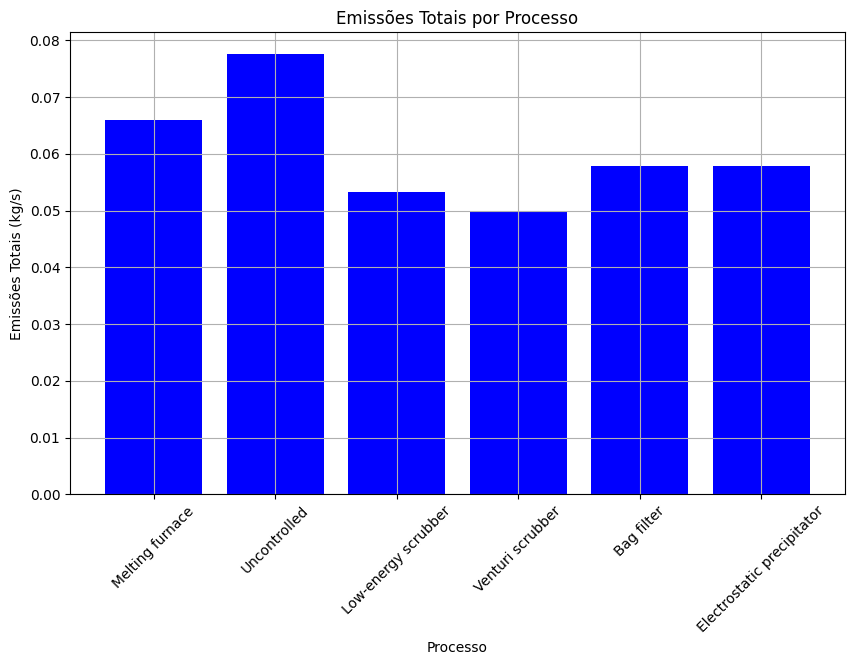

In [6]:
# Plotando as emissões totais por processo
plt.figure(figsize=(10, 6))
plt.bar(processos, emissoes_por_processo, color='blue')
plt.title('Emissões Totais por Processo')
plt.ylabel('Emissões Totais (kg/s)')
plt.xlabel('Processo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
